###############################################################################################################################

## Predicting Climate by Implementing Supervised Mechine Learning Regressor Algorithms



### By: Sara Khosravi
 ---------------------------


Instructor: Mr. Vijay Kumar
------------------------------------

###############################################################################################################################

#### 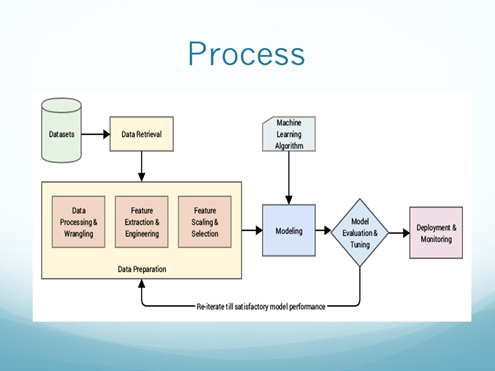

## 1. Introduction
###############################################################################################################################

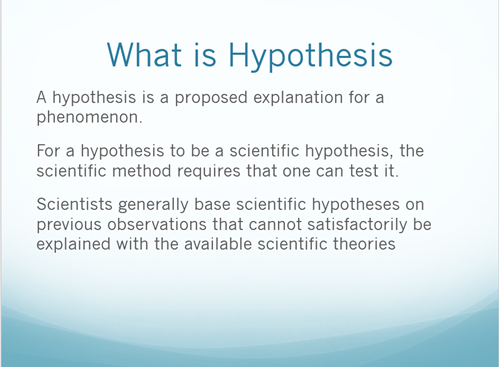

### 1.1. Problem Statement

## 2. DATA COLLECTION

###############################################################################################################################

### 2.1. Connect to dataset

In [1]:
# SETTING UP WORKING DIRECTORY
import os
os.getcwd()
os.chdir(r'C:\Sara\Data SCIENCE\Final Python\Project\notebooks\Data')
os.getcwd()

'C:\\Sara\\Data SCIENCE\\Final Python\\Project\\notebooks\\Data'

In [2]:
# IMPORTING PACKAGES AND LIBRARIES
import warnings
warnings.filterwarnings('ignore')

#import libraries for the data-structures
# Importing the numpy and pandas package
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

!pip3 install plotly
import plotly
import plotly.figure_factory as ff

from datetime import datetime
from matplotlib import dates
from datetime import datetime
import time

import statsmodels.api as sm
from scipy.stats import norm

#import libraries for modeling
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
import math
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
!pip install xgboost
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

print('Libraries imported and installed.')

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248514 sha256=a751c1a08e0f5d758c46d9bdf8707cd5af436c212c8a9250e3ec33931497210d
  Stored in directory: C:\Users\sarak\AppData\Local\Temp\pip-ephem-wheel-cache-4yyre6tm\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling
Libraries imported and installed.


In [3]:
#Read files:
train = pd.read_csv("Train_climate_data.csv")
test = pd.read_csv("Test_climate_data.csv")


### 2.2. combine the datasets

In [4]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index = True, sort = True)
print(train.shape,test.shape,data.shape)

(2307, 24) (929, 23) (3236, 24)


### 2.3. Find the top 10 records

In [5]:
#getting number of rows(obs)
data.shape[0]

3236

In [6]:
#getting number of collumns
data.shape[1]

24

In [7]:
#df2=df #copy by refrences
# getting copy of data ( copy by value)
#method1:
data_orginal=data.copy()
#method2:
data_orginal2=data[:]

In [8]:
data=data_orginal.copy()

In [9]:
data.head(10)

Average barometer (in)  Average dewpoint (°F)  Average direction (°deg)  \
0                    29.7                   12.7                     274.0   
1                    29.5                   14.7                     240.0   
2                    29.7                   12.7                     290.0   
3                    30.4                    0.1                      47.0   
4                    29.9                   -5.3                     265.0   
5                    29.8                    4.6                     276.0   
6                    29.7                   21.6                     276.0   
7                    29.8                   20.0                     265.0   
8                    30.0                   11.4                     292.0   
9                    30.4                    3.6                     258.0   

   Average gustspeed (mph)  Average humidity (%)  Average temperature (°F)  \
0                     36.8                  35.0                      37.8   
1                     18.0                  32.0                      43.2   
2                     12.2                  60.0                      25.7   
3                      4.5                  67.0                       9.3   
4                     23.1                  30.0                      23.5   
5                     23.9                  42.0                      24.8   
6                     30.0                  60.0                      34.2   
7                     25.2                  41.0                      42.1   
8                     10.6                  46.0                      30.3   
9                     24.6                  38.0                      26.2   

   Average windspeed (mph)        Date       Date1  Maximum gust speed (mph)  \
0                     26.4  2009-01-01  2009-01-01                      59.0   
1                     12.8  2009-01-02  2009-01-02                      51.0   
2                      8.3  2009-01-03  2009-01-03                      38.0   
3                      2.9  2009-01-04  2009-01-04                      20.0   
4                     16.7  2009-01-05  2009-01-05                      53.0   
5                     16.0  2009-01-06  2009-01-06                      48.0   
6                     20.4  2009-01-07  2009-01-07                      54.0   
7                     17.5  2009-01-08  2009-01-08                      49.0   
8                      6.9  2009-01-09  2009-01-09                      36.0   
9                     18.2  2009-01-10  2009-01-10                      46.0   

   ... Maximum temperature (°F)  Maximum windspeed (mph)  \
0  ...                     40.0                     41.4   
1  ...                     52.0                     35.7   
2  ...                     41.0                     25.3   
3  ...                     19.0                     12.7   
4  ...                     30.0                     38.0   
5  ...                     29.0                     29.9   
6  ...                     39.0                     38.0   
7  ...                     51.0                     35.7   
8  ...                     41.0                     24.2   
9  ...                     31.0                     31.1   

   Minimum humidity (%)  Minimum pressure  Minimum temperature (°F)  Month  \
0                  27.0            29.596                      34.0    1.0   
1                  16.0            29.268                      37.0    1.0   
2                  35.0            29.260                       6.0    1.0   
3                  35.0            30.227                       0.0    1.0   
4                  13.0            29.568                      15.0    1.0   
5                  27.0            29.637                      19.0    1.0   
6                  46.0            29.602                      27.0    1.0   
7                  28.0            29.627                      36.0    1.0   
8                  27.0            29.575

In [10]:
data.tail(10)

Average barometer (in)  Average dewpoint (°F)  Average direction (°deg)  \
3226                     NaN                    NaN                       NaN   
3227                     NaN                    NaN                       NaN   
3228                     NaN                    NaN                       NaN   
3229                     NaN                    NaN                       NaN   
3230                     NaN                    NaN                       NaN   
3231                     NaN                    NaN                       NaN   
3232                     NaN                    NaN                       NaN   
3233                     NaN                    NaN                       NaN   
3234                     NaN                    NaN                       NaN   
3235                     NaN                    NaN                       NaN   

      Average gustspeed (mph)  Average humidity (%)  Average temperature (°F)  \
3226                      NaN                   NaN                       NaN   
3227                      NaN                   NaN                       NaN   
3228                      NaN                   NaN                       NaN   
3229                      NaN                   NaN                       NaN   
3230                      NaN                   NaN                       NaN   
3231                      NaN                   NaN                       NaN   
3232                      NaN                   NaN                       NaN   
3233                      NaN                   NaN                       NaN   
3234                      NaN                   NaN                       NaN   
3235                      NaN                   NaN                       NaN   

      Average windspeed (mph) Date Date1  Maximum gust speed (mph)  ...  \
3226                      NaN  NaN   NaN                       NaN  ...   
3227                      NaN  NaN   NaN                       NaN  ...   
3228                      NaN  NaN   NaN                       NaN  ...   
3229                      NaN  NaN   NaN                       NaN  ...   
3230                      NaN  NaN   NaN                       NaN  ...   
3231                      NaN  NaN   NaN                       NaN  ...   
3232                      NaN  NaN   NaN                       NaN  ...   
3233                      NaN  NaN   NaN                       NaN  ...   
3234                      NaN  NaN   NaN                       NaN  ...   
3235                      NaN  NaN   NaN                       NaN  ...   

     Maximum temperature (°F)  Maximum windspeed (mph)  Minimum humidity (%)  \
3226                      NaN                      NaN                   NaN   
3227                      NaN                      NaN                   NaN   
3228                      NaN                      NaN                   NaN   
3229                      NaN                      NaN                   NaN   
3230                      NaN                      NaN                   NaN   
3231                      NaN                      NaN                   NaN   
3232                      NaN                      NaN                   NaN   
3233                      NaN                      NaN                   NaN   
3234                      NaN                      NaN                   NaN   
3235                      NaN                      NaN                   NaN   

      Minimum pressure  Minimum temperature (°F)  Month  \
3226               NaN                       NaN    NaN   
3227               NaN                       NaN    NaN   
3228               NaN                       NaN    NaN   
3229               NaN                       NaN    NaN   
3230               NaN                       NaN    NaN   
3231               NaN                       NaN    NaN   
3232               NaN                       NaN    NaN   
3233               NaN                     

### 2.4. Describe Dataset

In [11]:
data.describe()

Average barometer (in)  Average dewpoint (°F)  \
count             3001.000000            3008.000000   
mean                29.530923              23.475532   
std                  2.957505              14.561725   
min                  1.000000             -22.200000   
25%                 29.700000              12.500000   
50%                 29.900000              23.100000   
75%                 30.000000              35.600000   
max                 31.000000              55.100000   

       Average direction (°deg)  Average gustspeed (mph)  \
count               3012.000000              3012.000000   
mean                 202.877590                13.762417   
std                  105.460485                32.640924   
min                    0.000000                 0.000000   
25%                   99.000000                 4.500000   
50%                  246.000000                 7.400000   
75%                  277.000000                12.700000   
max                  360.000000               321.000000   

       Average humidity (%)  Average temperature (°F)  \
count           3005.000000                2298.00000   
mean              47.892479                  44.96980   
std               18.045125                  15.39031   
min               -7.400000                 -12.10000   
25%               35.000000                  34.10000   
50%               47.000000                  45.80000   
75%               60.000000                  58.00000   
max               92.000000                  82.00000   

       Average windspeed (mph)  Maximum gust speed (mph)  \
count              3012.000000               3012.000000   
mean                  5.914343                 36.090903   
std                   4.221016                 43.468829   
min                   0.000000                  0.000000   
25%                   2.700000                 20.000000   
50%                   4.700000                 27.600000   
75%                   8.200000                 35.700000   
max                  26.400000                255.300000   

       Maximum humidity (%)  Maximum pressure  Maximum rain per minute  \
count           3012.000000       3012.000000              3012.000000   
mean              72.208831         30.059692                 0.606541   
std               21.876360          0.259364                 4.975534   
min                1.000000         29.217000                 0.000000   
25%               61.000000         29.881000                 0.000000   
50%               80.000000         30.034000                 0.000000   
75%               89.000000         30.221000                 0.000000   
max               96.000000         31.204000                60.100000   

       Maximum temperature (°F)  Maximum windspeed (mph)  \
count               3012.000000              3012.000000   
mean                  57.332138                20.398772   
std                   18.199888                13.553379   
min                  -12.200000                 0.000000   
25%                   44.100000                13.800000   
50%                   57.600000                18.400000   
75%                   73.000000                24.200000   
max                   92.700000               181.700000   

       Minimum humidity (%)  Minimum pressure  Minimum temperature (°F)  \
count           3012.000000       3012.000000               3012.000000   
mean              25.755913         29.584383                 32.230412   
std               15.189022          1.600474                 14.851710   
min                0.000000          6.900000                -27.700000   
25%               15.000000         29.566750                 23.800000   
50%               22.000000         29.723500                 33.500000   
75%               31.000000         29.885250                 42.425000   
max               90.000000         40.300000                 89.000000   

             Month  Ra

In [12]:
from pandas_profiling import ProfileReport

pandas_profiling.ProfileReport(data)

=======================================================================================================================

# ---------------------------------------------  PART ONE   ----------------------------------------------

========================================================================================================================

# 3. Data Preprocessing

###############################################################################################################################

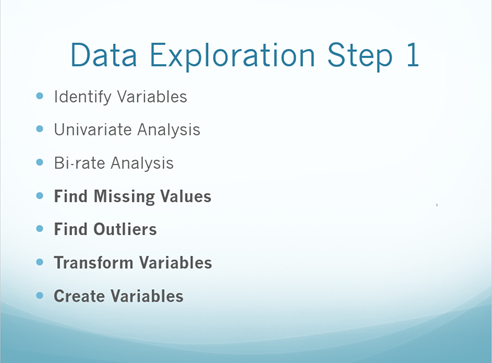



## ''''''''''''''''''''''''''''''''''''''''''''''''' Data Exploration Analyasis Step One '''''''''''''''''''''''''''''''''''''''''''''''''''

## ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

## 4. Data Exploration Analyasis Step " ONE"

###############################################################################################################################

### 4.1. Handling Duplicate Data

#### 4.1.1. Handling Duplicate Observation

In [13]:
# For cometiotion and if you want to keep even duplicated value for test
train=train.drop_duplicates()
train['source']='train'
test['source']='test'
data_nodub = pd.concat([train,test],ignore_index=True, sort=True)
print(data.shape,data_nodub.shape,'\n Number of duplicate data : ',data.shape[0]-data_nodub.shape[0])

(3236, 24) (3236, 24) 
 Number of duplicate data :  0


In [14]:
data = data_nodub

In [15]:
df = data

#### 4.1.2. Handlling Duplicate Columns

In [16]:
print(data.loc[df["Date"] != df["Date1"]])

      Average barometer (in)  Average dewpoint (°F)  Average direction (°deg)  \
2259                     2.3                   30.0                      0.28   
2260                     6.7                   29.7                      0.28   
2261                     2.8                   29.5                      0.28   
2262                    10.4                   29.7                      0.35   
2263                    15.2                   29.6                      0.35   
...                      ...                    ...                       ...   
3231                     NaN                    NaN                       NaN   
3232                     NaN                    NaN                       NaN   
3233                     NaN                    NaN                       NaN   
3234                     NaN                    NaN                       NaN   
3235                     NaN                    NaN                       NaN   

      Average gustspeed (mp

#### 4.1.3. Removing Redundancy

In [17]:
#Dropping the columns I had justified dropping
data = data.drop(["Average gustspeed (mph)", "Average direction (°deg)", "Rainfall for month (in)", "Rainfall for year (in)",
                        "Maximum rain per minute", "Maximum humidity (%)", "Minimum humidity (%)", "Maximum pressure", 
                        "Minimum pressure", "Maximum windspeed (mph)", "Maximum gust speed (mph)", "Maximum heat index (°F)",
                        "Date1", "Month", "diff_pressure"], axis = 1)
data.head()

Average barometer (in)  Average dewpoint (°F)  Average humidity (%)  \
0                    29.7                   12.7                  35.0   
1                    29.5                   14.7                  32.0   
2                    29.7                   12.7                  60.0   
3                    30.4                    0.1                  67.0   
4                    29.9                   -5.3                  30.0   

   Average temperature (°F)  Average windspeed (mph)        Date  \
0                      37.8                     26.4  2009-01-01   
1                      43.2                     12.8  2009-01-02   
2                      25.7                      8.3  2009-01-03   
3                       9.3                      2.9  2009-01-04   
4                      23.5                     16.7  2009-01-05   

   Maximum temperature (°F)  Minimum temperature (°F) source  
0                      40.0                      34.0  train  
1                      52.0                      37.0  train  
2                      41.0                       6.0  train  
3                      19.0                       0.0  train  
4                      30.0                      15.0  train

#### 4.1.4. Rename Columns

In [18]:
data.rename(columns={'Average barometer (in)':'Average barometer',
                     'Average dewpoint (°F)':'Dewpoint', 
                     'Average humidity (%)':'Humidity',
                     'Average temperature (°F)':'Temperature',
                     'Average windspeed (mph)':'Windspeed',
                     'Date':'Date',
                     'Maximum temperature (°F)':'MaxTemperature',
                     'Minimum temperature (°F)':'MinTemperature',
                    },inplace=True)
data.head()

Average barometer  Dewpoint  Humidity  Temperature  Windspeed        Date  \
0               29.7      12.7      35.0         37.8       26.4  2009-01-01   
1               29.5      14.7      32.0         43.2       12.8  2009-01-02   
2               29.7      12.7      60.0         25.7        8.3  2009-01-03   
3               30.4       0.1      67.0          9.3        2.9  2009-01-04   
4               29.9      -5.3      30.0         23.5       16.7  2009-01-05   

   MaxTemperature  MinTemperature source  
0            40.0            34.0  train  
1            52.0            37.0  train  
2            41.0             6.0  train  
3            19.0             0.0  train  
4            30.0            15.0  train

In [19]:
currentLabels = list(data.columns) #A list of the current columns

#The list of new column names I want
newLabels = ["Dewpoint", "Humidity", "Temperature", "Windspeed","Date", "MaxTemperature", "MinTemperature"]
numLabels = len(newLabels) #Get the length for the for loop

#For loop to change the column names
for i in range(0, numLabels):
    #Set the column names to the new columns, ignoring the Date name (that name is fine)
    data = data.rename(columns = {currentLabels[i + 1] : newLabels[i]})
    
data.head()

Average barometer  Dewpoint  Humidity  Temperature  Windspeed        Date  \
0               29.7      12.7      35.0         37.8       26.4  2009-01-01   
1               29.5      14.7      32.0         43.2       12.8  2009-01-02   
2               29.7      12.7      60.0         25.7        8.3  2009-01-03   
3               30.4       0.1      67.0          9.3        2.9  2009-01-04   
4               29.9      -5.3      30.0         23.5       16.7  2009-01-05   

   MaxTemperature  MinTemperature source  
0            40.0            34.0  train  
1            52.0            37.0  train  
2            41.0             6.0  train  
3            19.0             0.0  train  
4            30.0            15.0  train

### 4.2. Handling Missing Values

#### 4.2.1. Sorting Data by Date

###### --Sort by date help us to filling missing value reasnable

In [20]:
data.sort_values(by="Date" , ascending=True)

Average barometer  Dewpoint  Humidity  Temperature  Windspeed  \
0                  29.7      12.7      35.0         37.8       26.4   
1                  29.5      14.7      32.0         43.2       12.8   
2                  29.7      12.7      60.0         25.7        8.3   
3                  30.4       0.1      67.0          9.3        2.9   
4                  29.9      -5.3      30.0         23.5       16.7   
...                 ...       ...       ...          ...        ...   
3231                NaN       NaN       NaN          NaN        NaN   
3232                NaN       NaN       NaN          NaN        NaN   
3233                NaN       NaN       NaN          NaN        NaN   
3234                NaN       NaN       NaN          NaN        NaN   
3235                NaN       NaN       NaN          NaN        NaN   

            Date  MaxTemperature  MinTemperature source  
0     2009-01-01            40.0            34.0  train  
1     2009-01-02            52.0            37.0  train  
2     2009-01-03            41.0             6.0  train  
3     2009-01-04            19.0             0.0  train  
4     2009-01-05            30.0            15.0  train  
...          ...             ...             ...    ...  
3231         NaN             NaN             NaN   test  
3232         NaN             NaN             NaN   test  
3233         NaN             NaN             NaN   test  
3234         NaN             NaN             NaN   test  
3235         NaN             NaN             NaN   test  

[3236 rows x 9 columns]

#### 4.2.2.  Finding the Missing values

In [21]:
df.apply(lambda X:sum(X.isnull()))

Average barometer (in)      235
Average dewpoint (°F)       228
Average direction (°deg)    224
Average gustspeed (mph)     224
Average humidity (%)        231
Average temperature (°F)    938
Average windspeed (mph)     224
Date                        224
Date1                       224
Maximum gust speed (mph)    224
Maximum heat index (°F)     224
Maximum humidity (%)        224
Maximum pressure            224
Maximum rain per minute     224
Maximum temperature (°F)    224
Maximum windspeed (mph)     224
Minimum humidity (%)        224
Minimum pressure            224
Minimum temperature (°F)    224
Month                       224
Rainfall for month (in)     224
Rainfall for year (in)      224
diff_pressure                48
source                        0
dtype: int64

In [22]:
#method 2:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
  data1=data[data.columns[data.isnull().sum()>=1]] # I did slicing by condition( I get s subset of dataframe that contains columns that have atleast one missing values) )
  total_miss = data1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((data1.isnull().sum()/data1.isnull().count())*100).sort_values(ascending=False) #df1.isnull().sum() returns only number of missing values,df1.isnull().count() returns whole number of observations (True=1 for null and False=0 for not missing ) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [23]:
percentage_of_miss()

Number of Missing  Percentage
Temperature                      938   28.986403
Average barometer                235    7.262052
Humidity                         231    7.138443
Dewpoint                         228    7.045735
MinTemperature                   224    6.922126
MaxTemperature                   224    6.922126
Date                             224    6.922126
Windspeed                        224    6.922126

#### 4.2.3. Drop columns that have 80% or more missing values

In [24]:
df = data.dropna(axis=1, thresh=664)

In [25]:
df.apply(lambda X:sum(X.isnull()))

Average barometer    235
Dewpoint             228
Humidity             231
Temperature          938
Windspeed            224
Date                 224
MaxTemperature       224
MinTemperature       224
source                 0
dtype: int64

### 4.3. Filling Missing Values

#### 4.3.1. Filling Missing Values by Forward Fill

In [26]:
#Fill the null values
df = df.fillna(method  = "ffill") 
df

Average barometer  Dewpoint  Humidity  Temperature  Windspeed  \
0                  29.7      12.7      35.0         37.8       26.4   
1                  29.5      14.7      32.0         43.2       12.8   
2                  29.7      12.7      60.0         25.7        8.3   
3                  30.4       0.1      67.0          9.3        2.9   
4                  29.9      -5.3      30.0         23.5       16.7   
...                 ...       ...       ...          ...        ...   
3231               30.2      -7.1      17.0         66.0        0.0   
3232               30.2      -7.1      17.0         66.0        0.0   
3233               30.2      -7.1      17.0         66.0        0.0   
3234               30.2      -7.1      17.0         66.0        0.0   
3235               30.2      -7.1      17.0         66.0        0.0   

            Date  MaxTemperature  MinTemperature source  
0     2009-01-01            40.0            34.0  train  
1     2009-01-02            52.0            37.0  train  
2     2009-01-03            41.0             6.0  train  
3     2009-01-04            19.0             0.0  train  
4     2009-01-05            30.0            15.0  train  
...          ...             ...             ...    ...  
3231  2018-01-03            51.6            13.8   test  
3232  2018-01-03            51.6            13.8   test  
3233  2018-01-03            51.6            13.8   test  
3234  2018-01-03            51.6            13.8   test  
3235  2018-01-03            51.6            13.8   test  

[3236 rows x 9 columns]

#### 4.3.2. Filling Missing Values by Forward Fill through Visualization

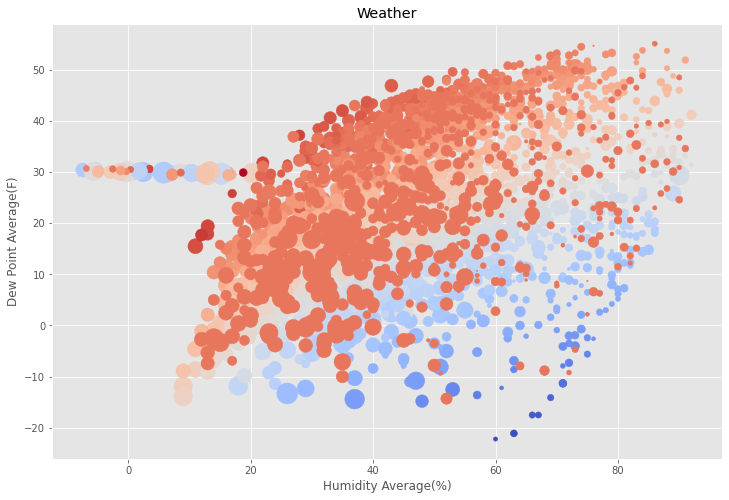

In [27]:
# code here
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df["Humidity"], df["Dewpoint"], c=df["Temperature"], s=df["Windspeed"]*20, cmap="coolwarm")
ax.set_xlabel("Humidity Average(%)")
ax.set_ylabel("Dew Point Average(F)")
ax.set_title("Weather")
plt.show()

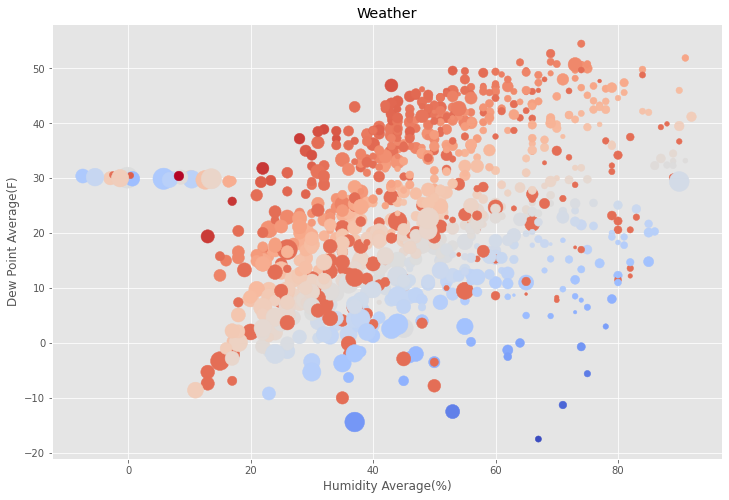

In [28]:
df2 = df.sample(1000).fillna(method="ffill")

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df2["Humidity"], df2["Dewpoint"], c=df2["Temperature"], s=df2["Windspeed"]*20, cmap="coolwarm")
ax.set_xlabel("Humidity Average(%)")
ax.set_ylabel("Dew Point Average(F)")
ax.set_title("Weather")
plt.show()

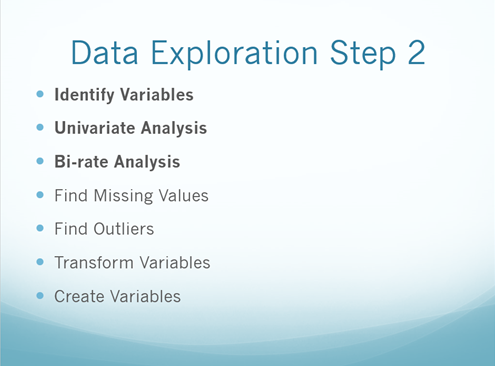



## '''''''''''''''''''''''''''''''''''''''''''''''' Data Exploration Analyasis Step TWO"'''''''''''''''''''''''''''''''''''''''''''''''''

## '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

## 5. Data Exploration Analyasis Step TWO

###############################################################################################################################

### 5.1. Identify variables

#### 5.1.1.  Find the Unique values

In [29]:
df.apply(lambda X:len(X.unique()))

Average barometer      58
Dewpoint              618
Humidity              127
Temperature           602
Windspeed             205
Date                 3012
MaxTemperature        644
MinTemperature        517
source                  2
dtype: int64

#### 5.1.2. Finding Information of the Dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average barometer  3236 non-null   float64
 1   Dewpoint           3236 non-null   float64
 2   Humidity           3236 non-null   float64
 3   Temperature        3236 non-null   float64
 4   Windspeed          3236 non-null   float64
 5   Date               3236 non-null   object 
 6   MaxTemperature     3236 non-null   float64
 7   MinTemperature     3236 non-null   float64
 8   source             3236 non-null   object 
dtypes: float64(7), object(2)
memory usage: 227.7+ KB


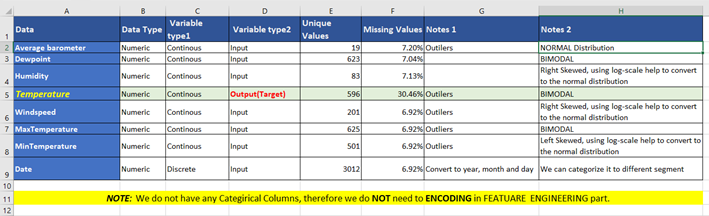

### 5.2. Univarate Analysis

#### 5.2.1. Getting the summary for Numeric Columns of Dataset

In [31]:
# Getting the summary of Data
pd.options.display.float_format = "{:.2f}".format
df.describe().T# for numeric columns

count  mean   std    min   25%   50%   75%   max
Average barometer 3236.00 29.58  2.85   1.00 29.70 29.90 30.10 31.00
Dewpoint          3236.00 21.35 16.05 -22.20  9.90 21.50 34.60 55.10
Humidity          3236.00 45.75 19.08  -7.40 32.00 45.00 59.00 92.00
Temperature       3236.00 51.01 16.10 -12.10 38.70 56.00 66.00 82.00
Windspeed         3236.00  5.50  4.34   0.00  2.30  4.40  7.80 26.40
MaxTemperature    3236.00 56.94 17.62 -12.20 44.98 55.70 72.03 92.70
MinTemperature    3236.00 30.95 15.07 -27.70 20.75 32.40 41.80 89.00

#### 5.2.2. Getting the summary for Discrete Vriables of Dataset

#### 5.2.2.1. Convert Date to year, month, and day

In [32]:
# convert column to datetime pandas
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Average barometer  3236 non-null   float64       
 1   Dewpoint           3236 non-null   float64       
 2   Humidity           3236 non-null   float64       
 3   Temperature        3236 non-null   float64       
 4   Windspeed          3236 non-null   float64       
 5   Date               3236 non-null   datetime64[ns]
 6   MaxTemperature     3236 non-null   float64       
 7   MinTemperature     3236 non-null   float64       
 8   source             3236 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 227.7+ KB


In [33]:
# Extract year, month, and day. Assign all these date component to new column.
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# drop a column based on name
df = df.drop('Date',axis=1)

df.head()

Average barometer  Dewpoint  Humidity  Temperature  Windspeed  \
0              29.70     12.70     35.00        37.80      26.40   
1              29.50     14.70     32.00        43.20      12.80   
2              29.70     12.70     60.00        25.70       8.30   
3              30.40      0.10     67.00         9.30       2.90   
4              29.90     -5.30     30.00        23.50      16.70   

   MaxTemperature  MinTemperature source  year  month  day  
0           40.00           34.00  train  2009      1    1  
1           52.00           37.00  train  2009      1    2  
2           41.00            6.00  train  2009      1    3  
3           19.00            0.00  train  2009      1    4  
4           30.00           15.00  train  2009      1    5

In [34]:
Month = df['month'].value_counts()
Month

1     506
10    279
8     279
11    269
6     269
3     248
5     244
7     241
4     231
12    226
9     225
2     219
Name: month, dtype: int64

In [35]:
Year = df['year'].value_counts()
Year

2016    366
2010    361
2014    357
2015    351
2012    337
2017    336
2009    331
2013    320
2011    250
2018    227
Name: year, dtype: int64

### 5.3. Data Visualization for Univarate Analysis

#### 5.3.1. Histogram for Numerical variables 

<AxesSubplot:>

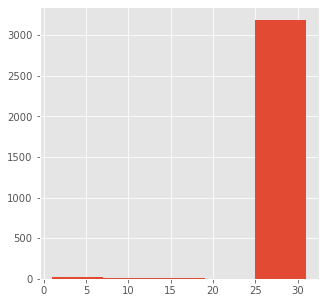

In [36]:
plt.figure(figsize=(5,5))
df['Average barometer'].hist(bins=5)

<AxesSubplot:>

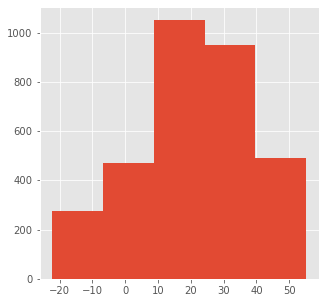

In [37]:
plt.figure(figsize=(5,5))
df['Dewpoint'].hist(bins=5)

<AxesSubplot:>

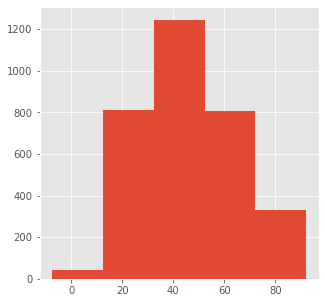

In [38]:
plt.figure(figsize=(5,5))
df['Humidity'].hist(bins=5)

<AxesSubplot:>

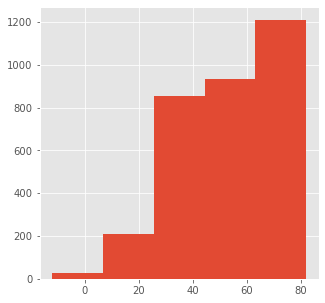

In [39]:
plt.figure(figsize=(5,5))
df['Temperature'].hist(bins=5)

<AxesSubplot:>

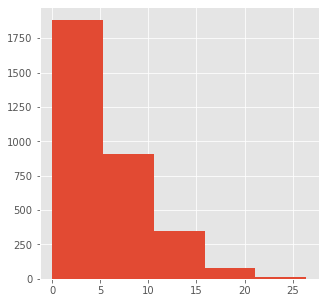

In [40]:
plt.figure(figsize=(5,5))
df['Windspeed'].hist(bins=5)

<AxesSubplot:>

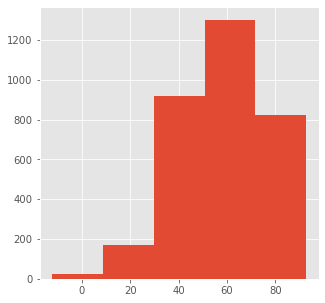

In [41]:
plt.figure(figsize=(5,5))
df['MaxTemperature'].hist(bins=5)

<AxesSubplot:>

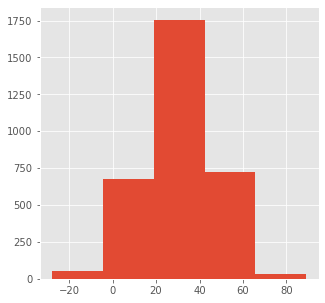

In [42]:
plt.figure(figsize=(5,5))
df['MinTemperature'].hist(bins=5)

#### 5.3.2. Barchart for Categorical or "Discrete"variables 

Text(0.5, 1, 'month')

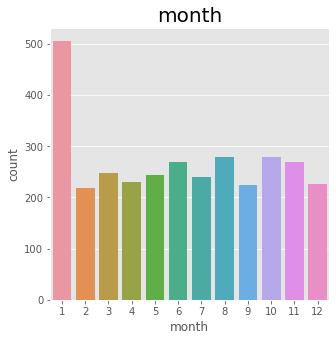

In [43]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(df['month'])
plt.title("month", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'year')

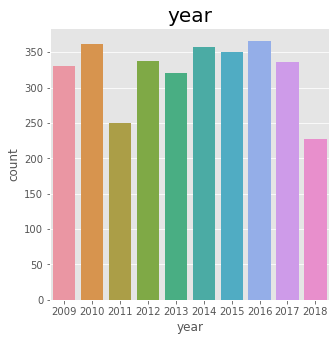

In [44]:
#countplot
plt.figure(figsize=(5,5))
sns.countplot(df['year'])
plt.title("year", y=1, fontdict={"fontsize": 20})

#### 5.3.3. Box plot for Outliers Detection

<AxesSubplot:>

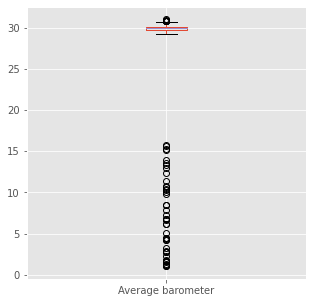

In [45]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Average barometer')

<AxesSubplot:>

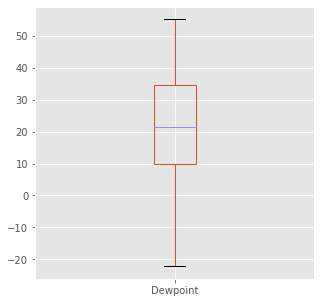

In [46]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Dewpoint')

<AxesSubplot:>

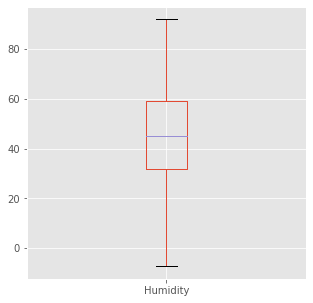

In [47]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Humidity')

<AxesSubplot:>

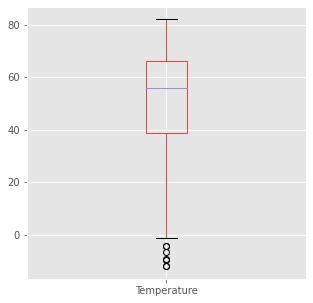

In [48]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Temperature')

<AxesSubplot:>

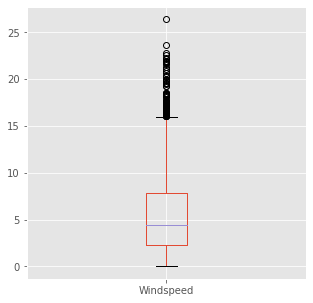

In [49]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Windspeed')

<AxesSubplot:>

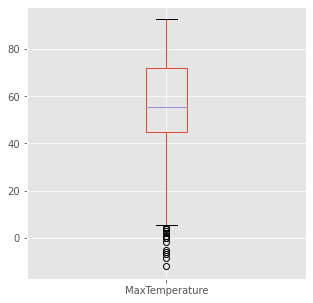

In [50]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'MaxTemperature')

<AxesSubplot:>

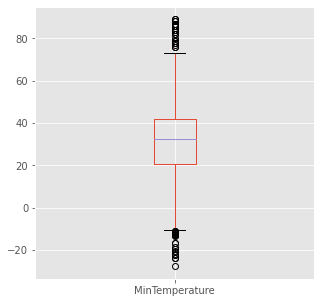

In [51]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'MinTemperature')

### 5.3.4. Visulaization Histogram, Dencity, Box plot and Frequency in ONE GRAPH

#### 5.3.4.1. Density Distribution

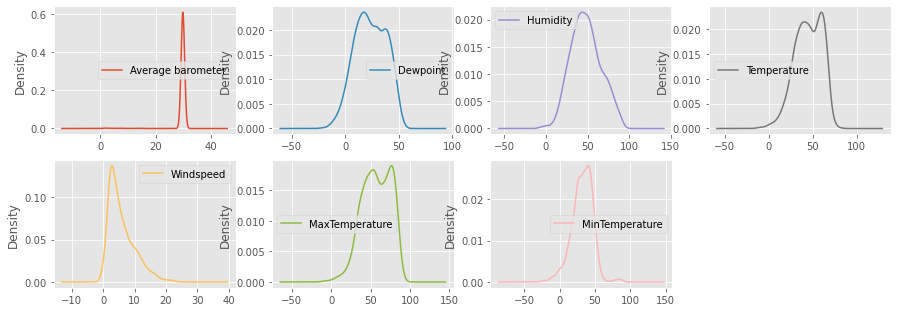

In [52]:
#densityPlot
data.plot(kind = 'density', subplots= True, layout = (3,4), sharex =False, figsize = (15, 8));

#### 5.3.4.2. Frequency Distribution

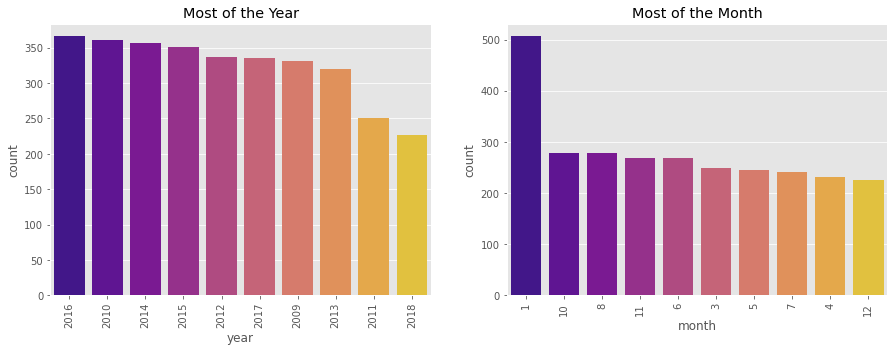

In [53]:
plt.rcParams['figure.figsize']=15,5


plt.subplot(121)
sns.countplot(df['year'],
             order=df['year'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Year')


plt.subplot(122)
sns.countplot(df['month'],
             order=df['month'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Month')


plt.show()


#### 5.3.4.3. Outliers Detection

In [54]:
df_Out = df.drop(columns = ['year','day','month'])

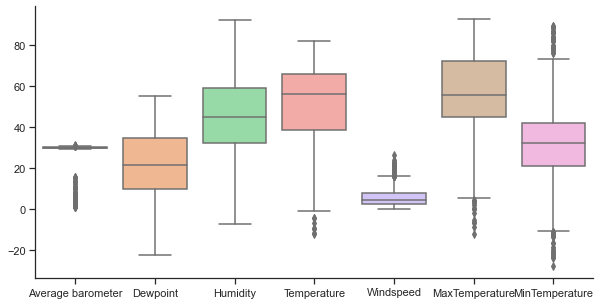

In [55]:
# Finding outliers by using BOXPLOT
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(10,5))
sns.boxplot(data=df_Out)
sns.despine()
#plt.xticks(rotation=90)

#### 5.3.4.4. Histogram Plot¶

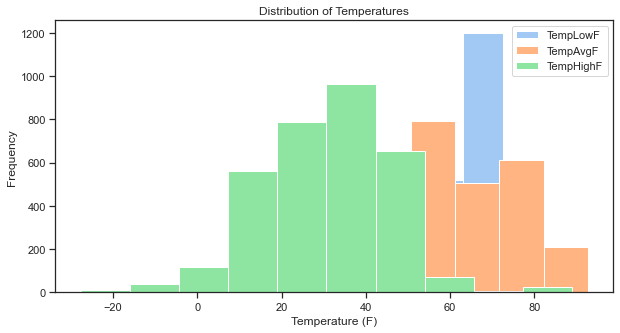

In [56]:
bins = 25

plt.figure(figsize=(10,5))

df['Temperature'].plot.hist(bins, histtype='bar', label='TempLowF')
df['MaxTemperature'].plot.hist(bins, histtype='bar', label='TempAvgF')
df['MinTemperature'].plot.hist(bins, histtype='bar', label='TempHighF')

plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (F)')
plt.legend()
plt.show()

### 5.3. Bivariate Analysis

### 5.3.1. Summaraization  Continouse Vs. Categorical

In [57]:
# Shall we combine each year together 

df.pivot_table(values='Temperature',index='year')

Temperature
year             
2009        45.40
2010        43.88
2011        44.45
2012        48.18
2013        41.02
2014        43.76
2015        47.80
2016        66.00
2017        66.00
2018        66.00

In pandas, the groupby function can be combined with one or more aggregation functions to quickly and easily summarize data.

In [58]:
agg_func_math = {
    'Temperature':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['year']).agg(agg_func_math).round(2)

Temperature                                       
           count  mean median    min   max   std    var
year                                                   
2009         331 45.40  46.50   2.80 70.00 13.59 184.55
2010         361 43.88  43.50   1.40 71.60 15.34 235.36
2011         250 44.45  44.60 -12.10 71.10 16.98 288.36
2012         337 48.18  49.00   8.50 76.30 14.29 204.31
2013         320 41.02  40.65  -4.40 72.10 16.02 256.49
2014         357 43.76  44.60  -9.60 72.50 15.65 244.82
2015         351 47.80  48.40   3.70 82.00 14.97 224.02
2016         366 66.00  66.00  66.00 66.00  0.00   0.00
2017         336 66.00  66.00  66.00 66.00  0.00   0.00
2018         227 66.00  66.00  66.00 66.00  0.00   0.00

In [59]:
df.pivot_table(values='Average barometer',index='year')

Average barometer
year                   
2009              29.93
2010              29.91
2011              29.89
2012              29.87
2013              29.94
2014              29.90
2015              26.75
2016              29.89
2017              29.87
2018              30.20

In [60]:
agg_func_math = {
    'Average barometer':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['month']).agg(agg_func_math).round(2)

Average barometer                                    
                  count  mean median   min   max  std   var
month                                                      
1                   506 30.13  30.20 29.30 30.80 0.21  0.05
2                   219 30.02  30.00 29.40 31.00 0.26  0.07
3                   248 29.93  29.90 29.30 30.60 0.24  0.06
4                   231 29.85  29.90 29.20 30.50 0.24  0.06
5                   244 29.81  29.80 29.20 30.50 0.23  0.05
6                   269 29.72  29.70 29.20 30.10 0.15  0.02
7                   241 29.79  29.80 29.40 30.20 0.13  0.02
8                   279 29.83  29.80 29.50 30.10 0.13  0.02
9                   225 29.87  29.90 29.30 30.40 0.19  0.04
10                  279 29.92  29.90 29.40 30.40 0.21  0.04
11                  269 28.52  30.00  1.00 30.80 5.79 33.48
12                  226 26.85  30.00  1.10 30.90 8.15 66.37

In [61]:
df.pivot_table(values='Dewpoint',index='year')

Dewpoint
year          
2009     24.71
2010     23.74
2011     21.90
2012     22.75
2013     19.66
2014     22.69
2015     27.77
2016     23.15
2017     24.34
2018     -7.07

In [62]:
agg_func_math = {
    'Dewpoint':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['month']).agg(agg_func_math).round(2)

Dewpoint                                       
         count  mean median    min   max   std    var
month                                                
1          506  1.22  -4.40 -14.40 30.20 10.04 100.83
2          219  8.46   8.40 -22.20 27.40  8.23  67.80
3          248 13.33  13.40  -9.80 32.70  7.38  54.45
4          231 20.46  21.90  -0.30 36.40  7.40  54.81
5          244 29.10  30.10   8.10 45.70  7.64  58.42
6          269 36.06  37.40  11.50 52.10  7.72  59.62
7          241 43.28  43.90  22.40 55.10  6.17  38.05
8          279 40.41  40.50  24.10 53.00  5.39  29.07
9          225 32.43  33.30  15.20 46.30  7.34  53.87
10         279 23.05  23.60   1.00 42.50  8.06  64.92
11         269 14.26  14.90 -14.10 32.80  9.16  83.94
12         226 11.09  10.40 -17.50 30.70 11.14 124.08

In [63]:
df.pivot_table(values='Humidity',index='year')

Humidity
year          
2009     50.53
2010     51.01
2011     46.80
2012     43.28
2013     48.12
2014     49.14
2015     45.86
2016     47.39
2017     48.72
2018     17.07

In [64]:
agg_func_math = {
    'Humidity':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['month']).agg(agg_func_math).round(2)

Humidity                                      
         count  mean median   min   max   std    var
month                                               
1          506 32.75  24.00  9.00 84.00 19.04 362.66
2          219 46.88  45.00 12.00 85.00 18.07 326.36
3          248 43.96  41.00 12.00 90.00 17.62 310.58
4          231 51.86  50.00 13.00 92.00 18.35 336.56
5          244 55.26  55.00 17.00 92.00 18.90 357.12
6          269 48.30  47.00 11.00 92.00 15.64 244.74
7          241 53.95  52.00 18.00 91.00 15.23 231.96
8          279 51.84  51.00 22.00 90.00 12.84 164.76
9          225 48.74  48.00 15.00 90.00 16.46 270.97
10         279 48.17  47.00 13.00 90.00 18.70 349.77
11         269 40.37  39.00 -5.40 86.00 18.72 350.40
12         226 40.37  39.00 -7.40 84.00 21.13 446.53

In [65]:
df.pivot_table(values='Windspeed',index='year')

Windspeed
year           
2009       7.01
2010       6.32
2011       6.27
2012       6.04
2013       6.24
2014       6.03
2015       5.15
2016       5.34
2017       5.05
2018       0.00

In [66]:
agg_func_math = {
    'Windspeed':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['month']).agg(agg_func_math).round(2)

Windspeed                                  
          count mean median  min   max  std   var
month                                            
1           506 4.64   1.30 0.00 26.40 5.85 34.27
2           219 8.00   7.60 0.10 20.00 4.85 23.54
3           248 7.14   6.60 1.00 20.90 4.02 16.16
4           231 5.68   5.00 0.00 16.20 3.44 11.81
5           244 5.22   4.05 0.00 21.90 3.70 13.68
6           269 4.52   4.00 1.50 16.90 2.28  5.18
7           241 3.75   3.30 0.00 12.70 1.99  3.96
8           279 3.52   3.00 0.00  9.80 1.80  3.24
9           225 3.93   3.30 0.30 16.70 2.54  6.46
10          279 5.46   4.70 0.00 22.20 3.82 14.58
11          269 7.52   7.40 0.00 23.70 4.44 19.68
12          226 8.08   8.00 0.00 22.80 5.49 30.11

In [67]:
df.pivot_table(values='Temperature',index='month')

Temperature
month             
1            50.45
2            36.47
3            43.89
4            45.47
5            51.63
6            61.07
7            63.96
8            63.03
9            58.69
10           49.47
11           43.70
12           41.46

In [68]:
agg_func_math = {
    'Temperature':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['month']).agg(agg_func_math).round(2)

Temperature                                       
            count  mean median    min   max   std    var
month                                                   
1             506 50.45  66.00  -1.00 66.00 19.19 368.09
2             219 36.47  31.50 -12.10 66.00 19.18 367.92
3             248 43.89  40.90   8.60 66.00 15.31 234.53
4             231 45.47  43.80  13.90 66.00 13.41 179.85
5             244 51.63  51.00  26.80 66.00 10.09 101.80
6             269 61.07  61.90  42.20 76.30  6.00  35.97
7             241 63.96  65.60  48.10 74.70  4.19  17.57
8             279 63.03  64.20  48.90 72.10  4.01  16.10
9             225 58.69  58.90  34.80 69.80  6.87  47.26
10            279 49.47  48.80  17.40 66.00 11.88 141.02
11            269 43.70  42.40  -6.70 80.00 15.92 253.41
12            226 41.46  37.45  -9.60 82.00 19.94 397.69

In [69]:
agg_func_math = {
    'Average barometer':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['month']).agg(agg_func_math).round(2)

Average barometer                                    
                  count  mean median   min   max  std   var
month                                                      
1                   506 30.13  30.20 29.30 30.80 0.21  0.05
2                   219 30.02  30.00 29.40 31.00 0.26  0.07
3                   248 29.93  29.90 29.30 30.60 0.24  0.06
4                   231 29.85  29.90 29.20 30.50 0.24  0.06
5                   244 29.81  29.80 29.20 30.50 0.23  0.05
6                   269 29.72  29.70 29.20 30.10 0.15  0.02
7                   241 29.79  29.80 29.40 30.20 0.13  0.02
8                   279 29.83  29.80 29.50 30.10 0.13  0.02
9                   225 29.87  29.90 29.30 30.40 0.19  0.04
10                  279 29.92  29.90 29.40 30.40 0.21  0.04
11                  269 28.52  30.00  1.00 30.80 5.79 33.48
12                  226 26.85  30.00  1.10 30.90 8.15 66.37

In [70]:
agg_func_math = {
    'Dewpoint':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['month']).agg(agg_func_math).round(2)

Dewpoint                                       
         count  mean median    min   max   std    var
month                                                
1          506  1.22  -4.40 -14.40 30.20 10.04 100.83
2          219  8.46   8.40 -22.20 27.40  8.23  67.80
3          248 13.33  13.40  -9.80 32.70  7.38  54.45
4          231 20.46  21.90  -0.30 36.40  7.40  54.81
5          244 29.10  30.10   8.10 45.70  7.64  58.42
6          269 36.06  37.40  11.50 52.10  7.72  59.62
7          241 43.28  43.90  22.40 55.10  6.17  38.05
8          279 40.41  40.50  24.10 53.00  5.39  29.07
9          225 32.43  33.30  15.20 46.30  7.34  53.87
10         279 23.05  23.60   1.00 42.50  8.06  64.92
11         269 14.26  14.90 -14.10 32.80  9.16  83.94
12         226 11.09  10.40 -17.50 30.70 11.14 124.08

In [71]:
agg_func_math = {
    'Humidity':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['month']).agg(agg_func_math).round(2)

Humidity                                      
         count  mean median   min   max   std    var
month                                               
1          506 32.75  24.00  9.00 84.00 19.04 362.66
2          219 46.88  45.00 12.00 85.00 18.07 326.36
3          248 43.96  41.00 12.00 90.00 17.62 310.58
4          231 51.86  50.00 13.00 92.00 18.35 336.56
5          244 55.26  55.00 17.00 92.00 18.90 357.12
6          269 48.30  47.00 11.00 92.00 15.64 244.74
7          241 53.95  52.00 18.00 91.00 15.23 231.96
8          279 51.84  51.00 22.00 90.00 12.84 164.76
9          225 48.74  48.00 15.00 90.00 16.46 270.97
10         279 48.17  47.00 13.00 90.00 18.70 349.77
11         269 40.37  39.00 -5.40 86.00 18.72 350.40
12         226 40.37  39.00 -7.40 84.00 21.13 446.53

In [72]:
agg_func_math = {
    'Windspeed':
    ['count','mean', 'median', 'min','max','std', 'var']
}
df.groupby(['month']).agg(agg_func_math).round(2)

Windspeed                                  
          count mean median  min   max  std   var
month                                            
1           506 4.64   1.30 0.00 26.40 5.85 34.27
2           219 8.00   7.60 0.10 20.00 4.85 23.54
3           248 7.14   6.60 1.00 20.90 4.02 16.16
4           231 5.68   5.00 0.00 16.20 3.44 11.81
5           244 5.22   4.05 0.00 21.90 3.70 13.68
6           269 4.52   4.00 1.50 16.90 2.28  5.18
7           241 3.75   3.30 0.00 12.70 1.99  3.96
8           279 3.52   3.00 0.00  9.80 1.80  3.24
9           225 3.93   3.30 0.30 16.70 2.54  6.46
10          279 5.46   4.70 0.00 22.20 3.82 14.58
11          269 7.52   7.40 0.00 23.70 4.44 19.68
12          226 8.08   8.00 0.00 22.80 5.49 30.11

### 5.3.2. Visualization Continouse Vs. Continouse

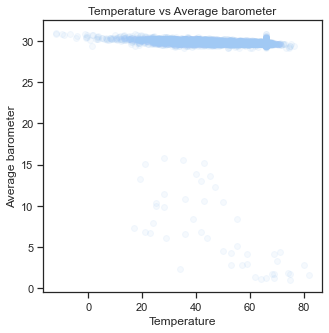

In [73]:
plt.figure(figsize=(5,5))
plt.scatter(df['Temperature'], df['Average barometer'], alpha=.1)

plt.title('Temperature vs Average barometer')
plt.xlabel('Temperature')
plt.ylabel('Average barometer')
plt.show()

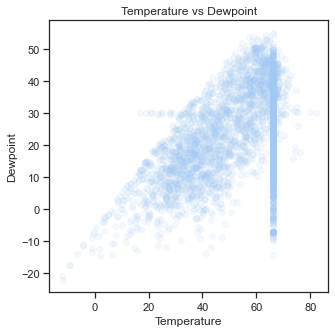

In [74]:
plt.figure(figsize=(5,5))
plt.scatter(df['Temperature'], df['Dewpoint'], alpha=.1)

plt.title('Temperature vs Dewpoint')
plt.xlabel('Temperature')
plt.ylabel('Dewpoint')
plt.show()

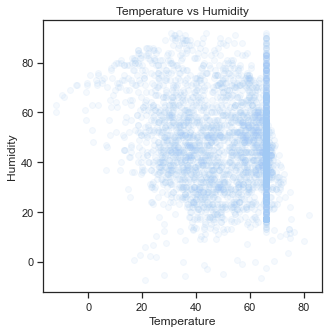

In [75]:
plt.figure(figsize=(5,5))
plt.scatter(df['Temperature'], df['Humidity'], alpha=.1)

plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

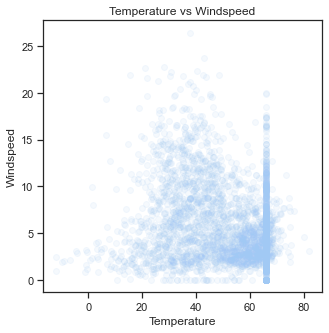

In [76]:
plt.figure(figsize=(5,5))
plt.scatter(df['Temperature'], df['Windspeed'], alpha=.1)

plt.title('Temperature vs Windspeed')
plt.xlabel('Temperature')
plt.ylabel('Windspeed')
plt.show()

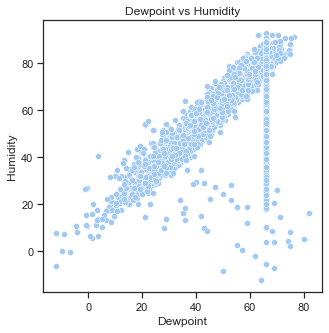

In [77]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="Temperature", y="MaxTemperature",data=df)

plt.title('Dewpoint vs Humidity')
plt.xlabel('Dewpoint')
plt.ylabel('Humidity')
plt.show()

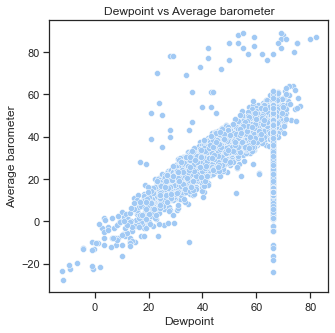

In [78]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="Temperature", y="MinTemperature",data=df)

plt.title('Dewpoint vs Average barometer')
plt.xlabel('Dewpoint')
plt.ylabel('Average barometer')
plt.show()

### 5.4. Univariate and  Bivariate Analysis

#### 5.4.1Scatter Matrix Plot

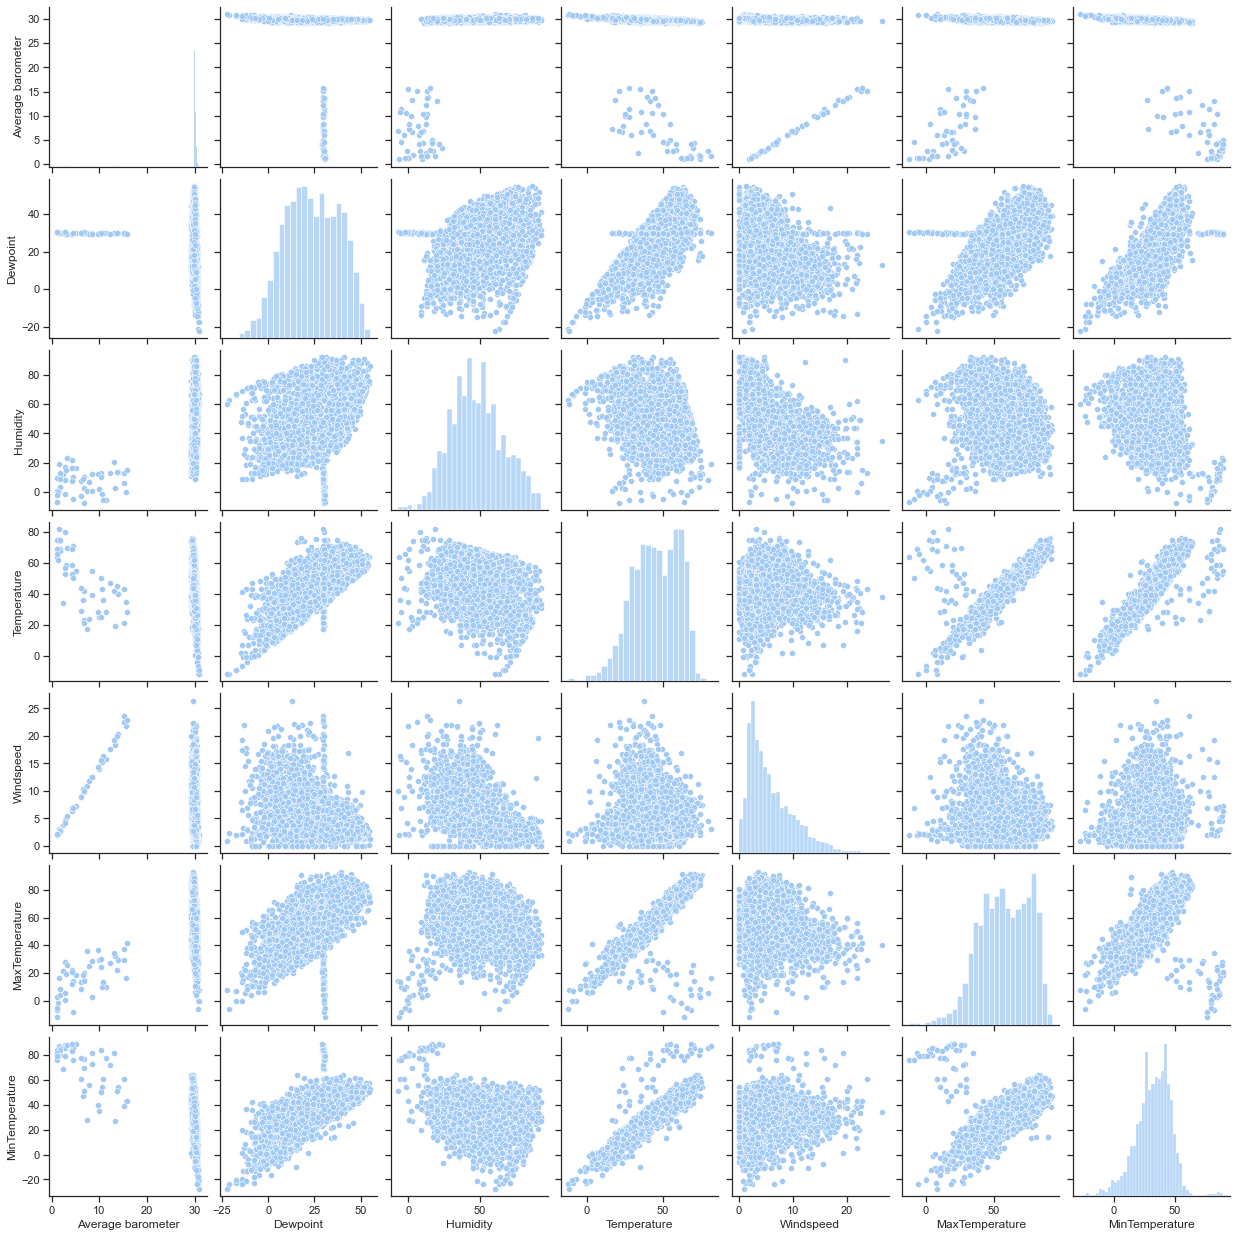

In [79]:
sns.pairplot(data)

## 6.  Fixing and Handling  Outliers 

###############################################################################################################################

In [80]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    df_out =df[(df[col]<LIF) | (df[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df_out[col] .describe()

<AxesSubplot:>

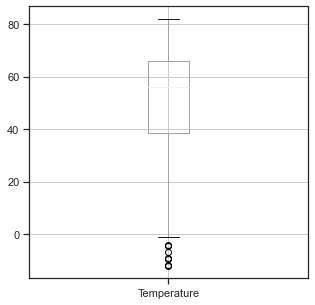

In [81]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Temperature')

count     7.00
mean     -8.30
std       3.25
min     -12.10
25%     -10.75
50%      -9.10
75%      -5.55
max      -4.30
Name: Temperature, dtype: float64

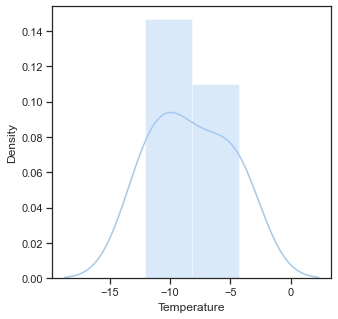

In [82]:
plt.figure(figsize=(5,5))
outlier_analysis('Temperature')

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

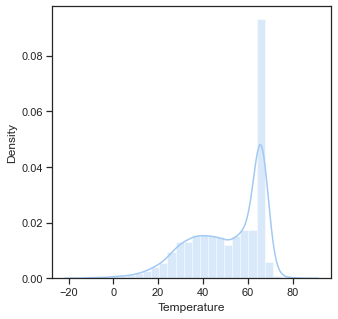

In [83]:
plt.figure(figsize=(5,5))
sns.distplot(df['Temperature'])

In [84]:
df['Temperature'] = df['Temperature'].apply(lambda val: () if (val>76 and val<20) else val)

In [85]:
df['Temperature'].mean()

51.00763288009889

<AxesSubplot:>

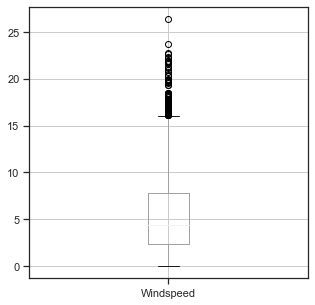

In [86]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'Windspeed')

In [87]:
Q1=df['Windspeed'].quantile(0.25)
Q3=df['Windspeed'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*(IQR)
Upper_Whisker = Q3+1.5*(IQR)
print(Lower_Whisker, Upper_Whisker)

2.3
7.8
5.5
-5.95 16.05


In [88]:
 df[df['Windspeed']< Lower_Whisker]

Empty DataFrame
Columns: [Average barometer, Dewpoint, Humidity, Temperature, Windspeed, MaxTemperature, MinTemperature, source, year, month, day]
Index: []

<AxesSubplot:>

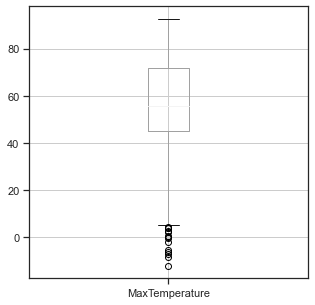

In [89]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'MaxTemperature')

count    14.00
mean     -1.69
std       5.29
min     -12.20
25%      -5.92
50%      -0.10
75%       2.65
max       4.30
Name: MaxTemperature, dtype: float64

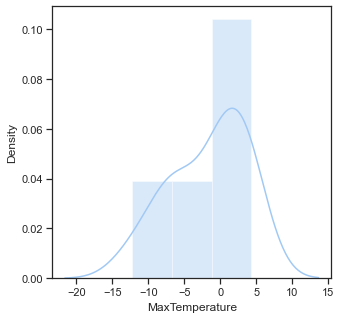

In [90]:
plt.figure(figsize=(5,5))
outlier_analysis('MaxTemperature')

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

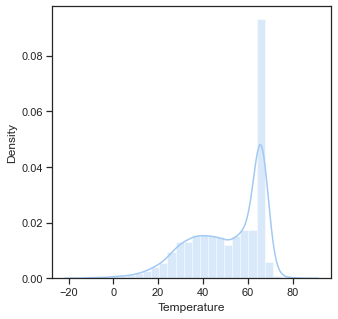

In [91]:
plt.figure(figsize=(5,5))
sns.distplot(df['Temperature'])

<AxesSubplot:>

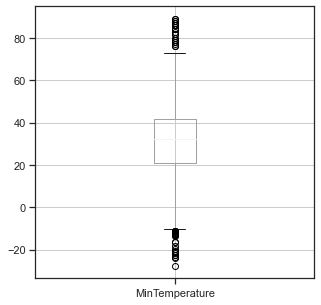

In [92]:
plt.figure(figsize=(5,5))
df.boxplot(column = 'MinTemperature')

count    51.00
mean     36.02
std      50.38
min     -27.70
25%     -13.25
50%      76.00
75%      84.00
max      89.00
Name: MinTemperature, dtype: float64

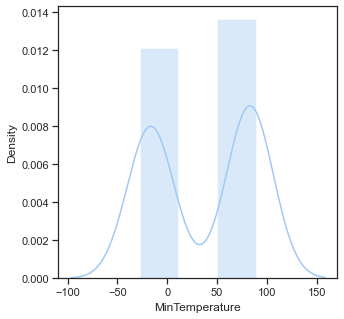

In [93]:
plt.figure(figsize=(5,5))
outlier_analysis('MinTemperature')

<AxesSubplot:xlabel='MinTemperature', ylabel='Density'>

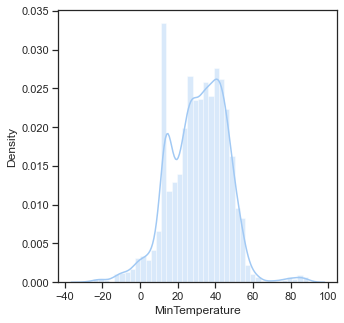

In [94]:
plt.figure(figsize=(5,5))
sns.distplot(df['MinTemperature'])

## 7. Transform Variables

###############################################################################################################################

### 7.1. Finding Skewness and Kurtosis

In [95]:
from scipy.stats import norm

<AxesSubplot:xlabel='Average barometer', ylabel='Density'>

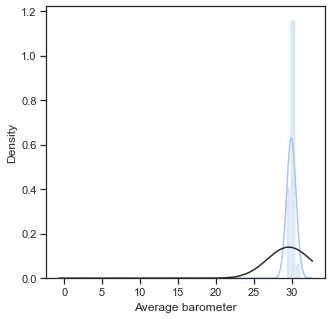

In [96]:
plt.figure(figsize=(5,5))
sns.distplot(df['Average barometer'], fit= norm)

In [97]:
#skewness and kurtosis
print("Skewness: %f" % df['Average barometer'].skew())
print("Kurtosis: %f" % df['Average barometer'].kurt())

Skewness: -8.377874
Kurtosis: 70.746041


<AxesSubplot:xlabel='Dewpoint', ylabel='Density'>

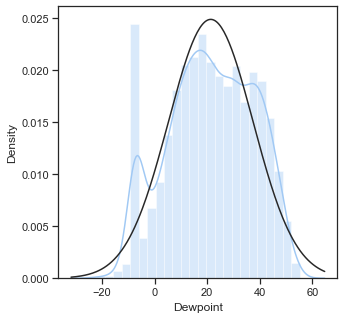

In [98]:
plt.figure(figsize=(5,5))
sns.distplot(df['Dewpoint'], fit= norm)

In [99]:
#skewness and kurtosis
print("Skewness: %f" % df['Dewpoint'].skew())
print("Kurtosis: %f" % df['Dewpoint'].kurt())

Skewness: -0.158284
Kurtosis: -0.845320


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

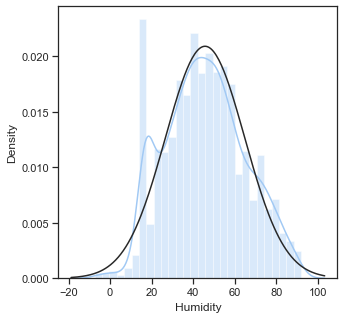

In [100]:
plt.figure(figsize=(5,5))
sns.distplot(df['Humidity'], fit= norm)

In [101]:
#skewness and kurtosis
print("Skewness: %f" % df['Humidity'].skew())
print("Kurtosis: %f" % df['Humidity'].kurt())

Skewness: 0.154267
Kurtosis: -0.580502


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

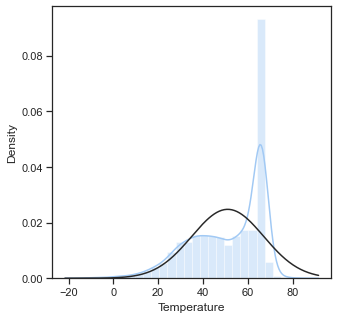

In [102]:
from scipy.stats import norm
plt.figure(figsize=(5,5))
sns.distplot(df['Temperature'], fit= norm)

In [103]:
#skewness and kurtosis
print("Skewness: %f" % df['Temperature'].skew())
print("Kurtosis: %f" % df['Temperature'].kurt())

Skewness: -0.799917
Kurtosis: -0.199005


<AxesSubplot:xlabel='Windspeed', ylabel='Density'>

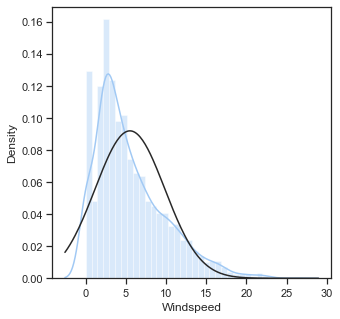

In [104]:
plt.figure(figsize=(5,5))
sns.distplot(df['Windspeed'], fit= norm)

In [105]:
#skewness and kurtosis
print("Skewness: %f" % df['Windspeed'].skew())
print("Kurtosis: %f" % df['Windspeed'].kurt())

Skewness: 1.107532
Kurtosis: 1.083733


<AxesSubplot:xlabel='MaxTemperature', ylabel='Density'>

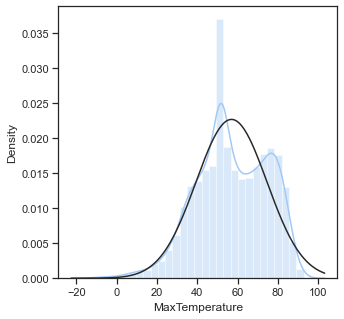

In [106]:
plt.figure(figsize=(5,5))
sns.distplot(df['MaxTemperature'], fit= norm)

In [107]:
#skewness and kurtosis
print("Skewness: %f" % df['MaxTemperature'].skew())
print("Kurtosis: %f" % df['MaxTemperature'].kurt())

Skewness: -0.309369
Kurtosis: -0.266173


<AxesSubplot:xlabel='MinTemperature', ylabel='Density'>

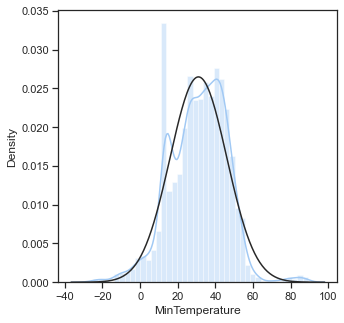

In [108]:
plt.figure(figsize=(5,5))
sns.distplot(df['MinTemperature'], fit= norm)

In [109]:
#skewness and kurtosis
print("Skewness: %f" % df['MinTemperature'].skew())
print("Kurtosis: %f" % df['MinTemperature'].kurt())

Skewness: -0.143409
Kurtosis: 0.833335


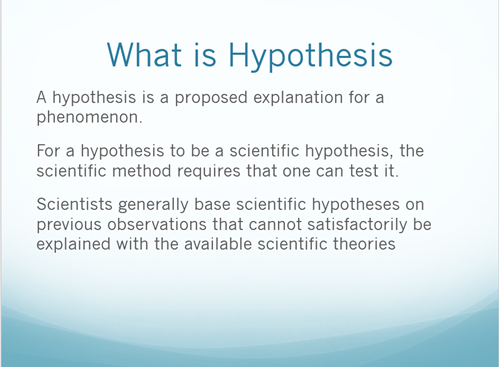

## 8. The Null and Alternate Hypotheses

###############################################################################################################################

### 8.1.  Correlation Heatmap¶

###### Correlation Concepts, Matrix & Heatmap using Seaborn:
    
    
Correlation is a term used to represent the statistical measure of linear relationship between two variables. It can also be defined as the measure of dependence between two different variables. If there are multiple variables and the goal is to find correlation between all of these variables and store them using appropriate data structure, the matrix data structure is used. Such matrix is called as correlation matrix. 

Dependence between two variables, also termed as correlation, can be measured using the following:

***Correlation coefficient / Pearson correlation coefficient which measures how the value of two different variables vary with respect to each other. 

***Rank correlation coefficient metric such as Spearman correlation coefficient is used to measure the extent to which one variable increases / decreases as the other variable increases / decreases. 


In [110]:
corrs = df.corr()
corrs

Average barometer  Dewpoint  Humidity  Temperature  \
Average barometer               1.00     -0.11      0.24        -0.02   
Dewpoint                       -0.11      1.00      0.51         0.35   
Humidity                        0.24      0.51      1.00        -0.26   
Temperature                    -0.02      0.35     -0.26         1.00   
Windspeed                      -0.11     -0.19     -0.30        -0.26   
MaxTemperature                  0.25      0.64     -0.06         0.63   
MinTemperature                 -0.37      0.75     -0.07         0.52   
year                           -0.06     -0.20     -0.22         0.47   
month                          -0.20      0.37      0.11         0.07   
day                            -0.06      0.20      0.14        -0.07   

                   Windspeed  MaxTemperature  MinTemperature  year  month  \
Average barometer      -0.11            0.25           -0.37 -0.06  -0.20   
Dewpoint               -0.19            0.64            0.75 -0.20   0.37   
Humidity               -0.30           -0.06           -0.07 -0.22   0.11   
Temperature            -0.26            0.63            0.52  0.47   0.07   
Windspeed               1.00           -0.24            0.08 -0.27   0.05   
MaxTemperature         -0.24            1.00            0.62 -0.03   0.19   
MinTemperature          0.08            0.62            1.00 -0.10   0.35   
year                   -0.27           -0.03           -0.10  1.00  -0.15   
month                   0.05            0.19            0.35 -0.15   1.00   
day                     0.12            0.03            0.16 -0.17   0.15   

                    day  
Average barometer -0.06  
Dewpoint           0.20  
Humidity           0.14  
Temperature       -0.07  
Windspeed          0.12  
MaxTemperature     0.03  
MinTemperature     0.16  
year              -0.17  
month              0.15  
day                1.00

In [111]:
plt.figure(figsize=(5,5))
corrs = df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

<Figure size 360x360 with 0 Axes>

In [112]:
plt.figure(figsize=(5,5))
figure

<Figure size 360x360 with 0 Axes>

### 8.2. Chi-squared test of independence

In [113]:
from scipy.stats import chi2_contingency

chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df['Temperature'],df['Humidity'],margins = False))# make sure margins = False

print(exp_val)
print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

if p_val < 0.05:# consider significan level is 5%
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

[[0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 ...
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]]

Chi-square is : 99065.868272 

p_value is : 0.000000 

degree of freedom is : 75726

There is some correlation between the two variables at significance level 0.05


In [114]:
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False

    print(exp_val)
    print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at significance level 0.05")
    else:
        print("\nThere is no correlation between the two variables")

In [115]:
chi_square("Temperature",'Humidity')

[[0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 ...
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]
 [0.00030902 0.00030902 0.00030902 ... 0.00309023 0.00154512 0.00123609]]

Chi-square is : 99065.868272 

p_value is : 0.000000 

degree of freedom is : 75726

There is some correlation between the two variables at significance level 0.05


In [116]:
chi_square("Temperature",'Windspeed')

[[0.08498146 0.00154512 0.00092707 ... 0.00030902 0.00030902 0.00030902]
 [0.08498146 0.00154512 0.00092707 ... 0.00030902 0.00030902 0.00030902]
 [0.08498146 0.00154512 0.00092707 ... 0.00030902 0.00030902 0.00030902]
 ...
 [0.08498146 0.00154512 0.00092707 ... 0.00030902 0.00030902 0.00030902]
 [0.08498146 0.00154512 0.00092707 ... 0.00030902 0.00030902 0.00030902]
 [0.08498146 0.00154512 0.00092707 ... 0.00030902 0.00030902 0.00030902]]

Chi-square is : 136588.636856 

p_value is : 0.000000 

degree of freedom is : 122604

There is some correlation between the two variables at significance level 0.05


In [117]:
chi_square("Temperature",'Average barometer')

[[0.00030902 0.00030902 0.00061805 ... 0.00185414 0.00030902 0.00030902]
 [0.00030902 0.00030902 0.00061805 ... 0.00185414 0.00030902 0.00030902]
 [0.00030902 0.00030902 0.00061805 ... 0.00185414 0.00030902 0.00030902]
 ...
 [0.00030902 0.00030902 0.00061805 ... 0.00185414 0.00030902 0.00030902]
 [0.00030902 0.00030902 0.00061805 ... 0.00185414 0.00030902 0.00030902]
 [0.00030902 0.00030902 0.00061805 ... 0.00185414 0.00030902 0.00030902]]

Chi-square is : 61249.119336 

p_value is : 0.000000 

degree of freedom is : 34257

There is some correlation between the two variables at significance level 0.05


In [118]:
chi_square("Temperature",'month')

[[0.15636588 0.06767614 0.07663782 ... 0.08621755 0.08312732 0.06983931]
 [0.15636588 0.06767614 0.07663782 ... 0.08621755 0.08312732 0.06983931]
 [0.15636588 0.06767614 0.07663782 ... 0.08621755 0.08312732 0.06983931]
 ...
 [0.15636588 0.06767614 0.07663782 ... 0.08621755 0.08312732 0.06983931]
 [0.15636588 0.06767614 0.07663782 ... 0.08621755 0.08312732 0.06983931]
 [0.15636588 0.06767614 0.07663782 ... 0.08621755 0.08312732 0.06983931]]

Chi-square is : 8991.639647 

p_value is : 0.000000 

degree of freedom is : 6611

There is some correlation between the two variables at significance level 0.05


In [119]:
chi_square("Temperature",'year')

[[0.10228677 0.11155748 0.07725587 ... 0.1131026  0.10383189 0.07014833]
 [0.10228677 0.11155748 0.07725587 ... 0.1131026  0.10383189 0.07014833]
 [0.10228677 0.11155748 0.07725587 ... 0.1131026  0.10383189 0.07014833]
 ...
 [0.10228677 0.11155748 0.07725587 ... 0.1131026  0.10383189 0.07014833]
 [0.10228677 0.11155748 0.07725587 ... 0.1131026  0.10383189 0.07014833]
 [0.10228677 0.11155748 0.07725587 ... 0.1131026  0.10383189 0.07014833]]

Chi-square is : 8382.156256 

p_value is : 0.000000 

degree of freedom is : 5409

There is some correlation between the two variables at significance level 0.05


### 8.3. Anova Test for Continouse Vs. Categorical

In [120]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: statsmodels in c:\programdata\anaconda3\lib\site-packages (from researchpy) (0.12.0)



In [121]:
import researchpy as rp
rp.summary_cont(df['Temperature'].groupby(df['year']))

N  Mean    SD   SE  95% Conf.  Interval
year                                           
2009  331 45.40 13.59 0.75      43.93     46.87
2010  361 43.88 15.34 0.81      42.29     45.47
2011  250 44.45 16.98 1.07      42.34     46.57
2012  337 48.18 14.29 0.78      46.65     49.71
2013  320 41.02 16.02 0.90      39.26     42.78
2014  357 43.76 15.65 0.83      42.14     45.39
2015  351 47.80 14.97 0.80      46.23     49.37
2016  366 66.00  0.00 0.00        nan       nan
2017  336 66.00  0.00 0.00        nan       nan
2018  227 66.00  0.00 0.00        nan       nan

In [122]:
import researchpy as rp
rp.summary_cont(df['Temperature'].groupby(df['month']))

N  Mean    SD   SE  95% Conf.  Interval
month                                           
1      506 50.45 19.19 0.85      48.77     52.12
2      219 36.47 19.18 1.30      33.92     39.03
3      248 43.89 15.31 0.97      41.98     45.81
4      231 45.47 13.41 0.88      43.73     47.21
5      244 51.63 10.09 0.65      50.36     52.91
6      269 61.07  6.00 0.37      60.35     61.79
7      241 63.96  4.19 0.27      63.43     64.50
8      279 63.03  4.01 0.24      62.56     63.50
9      225 58.69  6.87 0.46      57.79     59.59
10     279 49.47 11.88 0.71      48.07     50.87
11     269 43.70 15.92 0.97      41.79     45.62
12     226 41.46 19.94 1.33      38.84     44.07

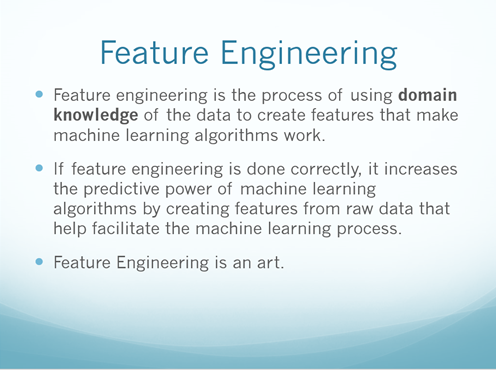

## 9. Feature Engieering

###############################################################################################################################

### 9.1. Frequency of Categories of the Dataset

In [123]:
#Filter categorical variables 
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns
                      if x not in ['Date','source']]
#Print frequency of categories:
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s' %col)
    print(df[col].value_counts())

In [124]:
df['year'].value_counts()

2016    366
2010    361
2014    357
2015    351
2012    337
2017    336
2009    331
2013    320
2011    250
2018    227
Name: year, dtype: int64

In [125]:
df['month'].value_counts()

1     506
10    279
8     279
11    269
6     269
3     248
5     244
7     241
4     231
12    226
9     225
2     219
Name: month, dtype: int64

In [126]:
# Temperature

#Determine average Temperature of the dataset:
Temperature_avg = df.pivot_table(values='Temperature', index='year')

#Impute 0 values with mean Temperature of the dataset:
miss_bool = (df['Temperature'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool) )

df.loc[miss_bool,'Temperature'] = df.loc[miss_bool,'Temperature'].apply(lambda x: visibility_avg.at[x,'Temperature'])
print ('Number of 0 values after modification: %d'%sum(df['Temperature'] == 0) )

Number of 0 values initially: 0
Number of 0 values after modification: 0


In [127]:
# Temperature

#Determine average Temperature of the dataset:
Temperature_avg = df.pivot_table(values='Temperature', index='month')

#Impute 0 values with mean Temperature of the dataset:
miss_bool = (df['Temperature'] == 0)

print ('Number of 0 values initially: %d'%sum(miss_bool) )

df.loc[miss_bool,'Temperature'] = df.loc[miss_bool,'Temperature'].apply(lambda x: visibility_avg.at[x,'Temperature'])
print ('Number of 0 values after modification: %d'%sum(df['Temperature'] == 0) )

Number of 0 values initially: 0
Number of 0 values after modification: 0


### 9.2.  Creating New Features relative humidity and actual vapour pressure

#### --compute absolute and relative humidity from temperature and dew point:

In [128]:
# convert everything into celsius
temp = (df['Temperature'] - 32) / 1.8
dewp = (df['Dewpoint'] - 32) / 1.8
maxtemp = (df['MaxTemperature'] - 32) / 1.8 
mintemp = (df['MinTemperature'] - 32) / 1.8 
    
# compute relative humidity as ratio between actual vapour pressure (computed from dewpoint temperature)
# and saturation vapour pressure (computed from temperature) (the constant 6.1121 cancels out)
df['rh'] = (np.exp((18.678*dewp)/(257.14+dewp))/np.exp((18.678*temp)/(257.14+temp)))

# calculate actual vapour pressure (in pascals)
# then use it to compute absolute humidity from the gas law of vapour 
# (ah = mass / volume = pressure / (constant * temperature))
df['ah'] = ((np.exp((18.678*dewp)/(257.14+dewp))) * 6.1121 * 100) / (461.5 * temp)


In [129]:
df.head()

Average barometer  Dewpoint  Humidity  Temperature  Windspeed  \
0              29.70     12.70     35.00        37.80      26.40   
1              29.50     14.70     32.00        43.20      12.80   
2              29.70     12.70     60.00        25.70       8.30   
3              30.40      0.10     67.00         9.30       2.90   
4              29.90     -5.30     30.00        23.50      16.70   

   MaxTemperature  MinTemperature source  year  month  day   rh    ah  
0           40.00           34.00  train  2009      1    1 0.35  0.18  
1           52.00           37.00  train  2009      1    2 0.31  0.10  
2           41.00            6.00  train  2009      1    3 0.57 -0.17  
3           19.00            0.00  train  2009      1    4 0.66 -0.03  
4           30.00           15.00  train  2009      1    5 0.28 -0.05

### 9.3. Memory reduction

In [130]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

### 9.4. Export the data back (Split Dataset)

In [131]:
train=df[df['source']=='train']
test=df[df['source']=='test']

### 9.3. Choosing Target 

### 9.4. Drop unnecessary columns

In [132]:
#Renaming dataset
#df = data

#Splitting dataset into labels and features
X = df.drop(columns = ['Temperature','source','rh','ah','day'],axis=1)
y = df.Temperature

In [133]:
#Renaming dataset
#df = data

#Splitting dataset into labels and features
x = train.drop(columns = ['Temperature','source','rh','ah','day'],axis=1)
Y = train.Temperature

### 9.5. Export files as modified versions

In [134]:
#Export files as modified versions:
train.to_csv("July2021_train_climate_modified.csv",index=False)
test.to_csv("July2021_test_climate_modified.csv",index=False)

In [135]:
df.to_csv("July2021_df_climate_modified.csv",index=False)

## 10. Standardize Data 

###############################################################################################################################

In [136]:
# DATA PREPROCESSING - Scaling Data

#standardizing all the columns
sc=StandardScaler()
scaled=sc.fit_transform(X)

#converted to dataframe to work easily on columns
X_scaled=pd.DataFrame(scaled, columns=X.columns)
#print(data)

========================================================================================================================

# --------------------------------   PART TWO MODEL BUILDING   -------------------------------

========================================================================================================================

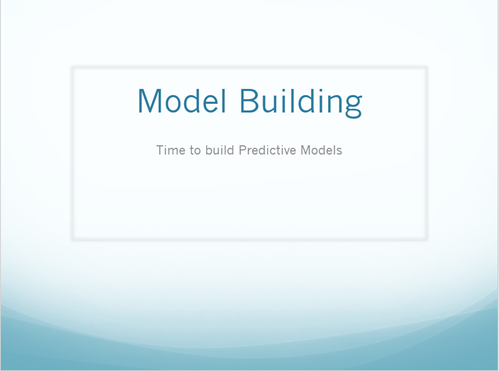

*******************************************************************************************************************************
###############################################################################################################################

# ''''''''''''''''''''''...Data Handling - Predictive / Supervised Learning...''''''''''''''''''''

###############################################################################################################################
*******************************************************************************************************************************

## 1.Ordinary Least Squares ( OLS) method
###############################################################################################################################

In [137]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     943.5
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:22:15   Log-Likelihood:                -11633.
No. Observations:                3236   AIC:                         2.328e+04
Df Residuals:                    3227   BIC:                         2.334e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5174.1002    124.44

In [138]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     943.5
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:22:16   Log-Likelihood:                -11633.
No. Observations:                3236   AIC:                         2.328e+04
Df Residuals:                    3227   BIC:                         2.334e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5174.1002    124.44

## 2. Climate Analysis by Implementing Mechine Learning Algorithms

###############################################################################################################################

In [139]:
#scaling data is necessary for making gradient descent faster 
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
y = pd.Series(y)

In [140]:
#For cross-validation using train-test split ( TEST-SIZE = 30% )
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [141]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("y_train shape {}, len {}.".format(y_train.shape,len(y_train)))
print("y_test shape {}, len {}.".format(y_test.shape,len(y_test)))

X_train shape (2427, 8), len 2427.
X_test shape (809, 8), len 809.
y_train shape (2427,), len 2427.
y_test shape (809,), len 809.


### 2.1. MACRO FOR CALCULATING  R-squared,Adjust R-squared and Root Mean Square Error(RMSE)

In [142]:
#display R-squared,Adjust R-squared and Root Mean Square Error(RMSE)

# adjusted_r2_squared = 1 - (1-r2_square)*(len(y)-1)/(len(y)-X.shape[1]-1)
results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "MAE", "MSE", "RMSE", "R2","AdjustR2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    adjusted_r2_squared = 1 - (1-r2_square)*(len(true)-1)/(len(true)-X.shape[1]-1)
    return mae, mse, rmse, r2_square, adjusted_r2_squared


def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred), cross_val_score(model, X, y,cv=5).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

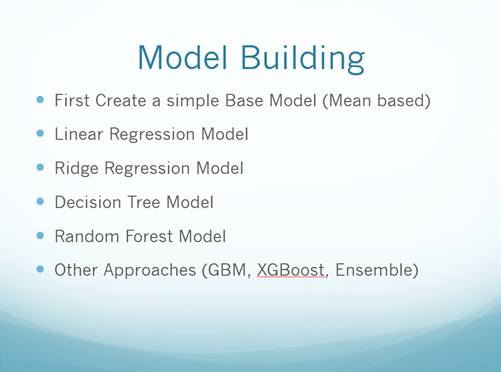

### 2.2.1. KNN Model

In [143]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

### 2.2.2. Linear Regression Model

In [144]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
pred_l_reg = l_reg.predict(X_test)

In [145]:
# COEFFICIENTS
cdf1 =pd.DataFrame(l_reg.coef_,X.columns,columns=['Coeffecient_l_reg'])
cdf1

Coeffecient_l_reg
0               1.65
1               1.16
2              -3.50
3              -2.10
4               4.84
5               5.91
6               7.14
7              -0.64

### 2.2.3. SVR Model

In [146]:
svr = SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)

### 2.2.4. Random Forest Model

In [147]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test)

### 2.2.5. Ada Boost Model

In [148]:
adab_reg = AdaBoostRegressor()
adab_reg.fit(X_train, y_train)
pred_adab = adab_reg.predict(X_test)

### 2.2.6. Ridge Regression Model 

In [149]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
pred_ridge = ridge_reg.predict(X_test)

### 2.2.7. Decision Tree Regressor Model

In [150]:
dtree = tree.DecisionTreeRegressor()
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

### 2.2.8. Gradient Boosting Regressor Model (GBM)

In [151]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
pred_gbm = gbm.predict(X_test)

### 2.2.9. XGBoost Regressor Model

In [152]:
xg_reg = xgb.XGBRegressor()

In [153]:
xg_reg.fit(X_train, y_train)
pred_xg_reg = xg_reg.predict(X_test)

### 2.2.10. LassoCV Regressor Model

In [154]:
lasso = LassoCV()

In [155]:
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

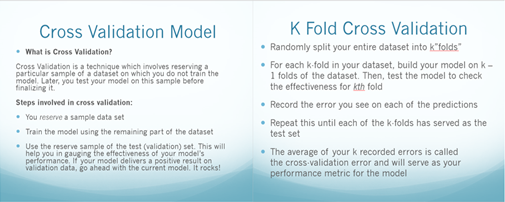

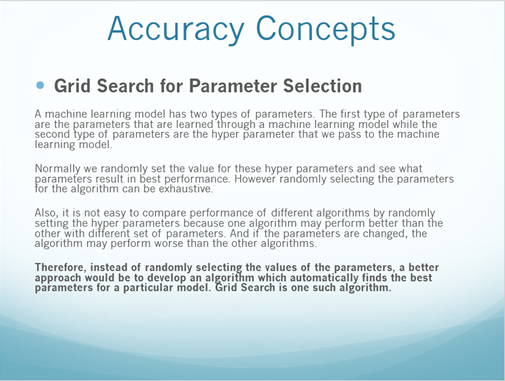

## 2.3. Regularization and Optimization all Models

###############################################################################################################################

### 2.3.1. KNN Opt

In [156]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=3).mean())

In [157]:
scores

[-3.0528434911585958,
 -3.672884925754827,
 -3.377201691145725,
 -3.6173335174286305,
 -3.695133042767479,
 -3.564444957392981,
 -3.4544504917283927,
 -3.3695057112940514,
 -3.4382607171581943,
 -3.4364926885349014]

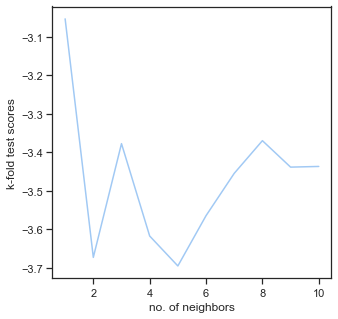

In [158]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

In [159]:
#KNN TUNING:

#Initiating Random Forest regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')

#Define the grid of hyperparameters
params_grid = {'n_neighbors': [3,5,10],
              'weights': ['uniform']
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = knn_model, param_grid = params_grid , cv = 3)
                       
#Fitting the grid search
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 10], 'weights': ['uniform']})

In [160]:
#let's create a model to test

#K-fold score within the training set of the best model
knn_opt = grid_model.best_estimator_

#training on the same set
knn_opt.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_knn_opt = knn_opt.predict(X_test)

In [161]:
SSE = np.sum((y_test-pred_knn_opt)**2)
SST = np.sum((y_test-np.mean(pred_knn_opt))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [162]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_knn_opt = 1-((n-1)*(1- R2)/(n-k-1))

In [163]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('Test R^2        : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2        : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('Training R^2    : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_knn_opt)) #R^2
print('AdjustR2  :',AdjustR2_knn_opt)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_knn_opt))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_knn_opt[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'n_neighbors': 5, 'weights': 'uniform'}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.8749615966691003
Test R^2        : 0.901
Test R^2        : 0.901
Training R^2    : 0.927
---------------------------------------------------------------------------------------------------------------------

SSE= 22047.2792
SST= 223032.50797330035
SSR= 200985.22877330036
Coefficient of Determination= 0.9011476873916545
-----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

Checking the performance of the model:
R2        : 

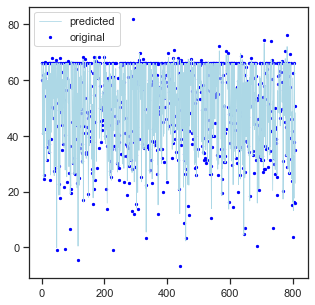

In [164]:
# PLOTTING THE PREDICTIONS
plt.figure(figsize=(5,5))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_knn_opt, lw=0.8, color="lightblue", label="predicted")
plt.legend()
plt.show()

### 2.3.2. Linear Regression Optimization

In [165]:
lregressor = LinearRegression(fit_intercept=True, normalize=False)

In [166]:
#compare that k-fold scores
print("linear regression's 5-fold score:",cross_val_score(lregressor, X,y, cv=5).mean())

linear regression's 5-fold score: 0.35334915926780014


In [167]:
# Linear Regression TUNING:

'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params_grid = { 'normalize':['bool','False'],
                'n_jobs' : [1]
         }
grid_model = GridSearchCV(lregressor, params_grid, cv=5)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [1], 'normalize': ['bool', 'False']})

In [168]:
#let's create a model to test

#K-fold score within the training set of the best model
l_sgdreg = grid_model.best_estimator_

#training on the same set
l_sgdreg.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_l_sgdreg = l_sgdreg.predict(X_test)

In [169]:
#the best linear model's internal attributes (coefficient)
cdf2 =pd.DataFrame(l_sgdreg.coef_,X.columns,columns=['Coeffecient_l_sgdreg'])
cdf2

Coeffecient_l_sgdreg
0                  1.65
1                  1.16
2                 -3.50
3                 -2.10
4                  4.84
5                  5.91
6                  7.14
7                 -0.64

In [170]:
#model's intercept
l_sgdreg.intercept_

50.96091443752527

In [171]:
#Coeffecient
cdf1['Coeffecient_l_sgdreg'] = pd.DataFrame(l_sgdreg.coef_,X.columns,columns=['Coeffecient_l_sgdreg'])
cdf1

Coeffecient_l_reg  Coeffecient_l_sgdreg
0               1.65                  1.65
1               1.16                  1.16
2              -3.50                 -3.50
3              -2.10                 -2.10
4               4.84                  4.84
5               5.91                  5.91
6               7.14                  7.14
7              -0.64                 -0.64

In [172]:
SSE = np.sum((y_test-pred_l_sgdreg)**2)
SST = np.sum((y_test-np.mean(pred_l_sgdreg))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [173]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_l_sgdreg = 1-((n-1)*(1- R2)/(n-k-1))

In [174]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('Test R^2        : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2        : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('Training R^2    : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_l_sgdreg)) #R^2
print('AdjustR2  :',AdjustR2_l_sgdreg)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_l_sgdreg))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_l_sgdreg[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'n_jobs': 1, 'normalize': 'bool'}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.6986005771865533
Test R^2        : 0.697
Test R^2        : 0.697
Training R^2    : 0.701
---------------------------------------------------------------------------------------------------------------------

SSE= 67632.50911473576
SST= 223058.73421326152
SSR= 155426.22509852576
Coefficient of Determination= 0.6967950645228991
-----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

Checking the performance of the model:
R2        :

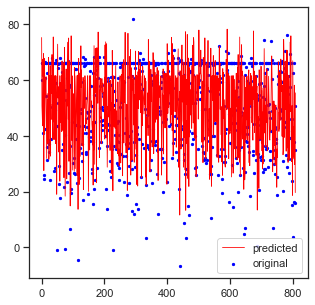

In [175]:
# plotting the result
plt.figure(figsize=(5,5))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_l_sgdreg, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### 2.3.3. SVR opt

In [176]:
svr = SVR(kernel='rbf',C=1, gamma='auto')

In [177]:
print("svr's 5-fold score:",cross_val_score(svr,X_scaled,y,cv=5).mean())

svr's 5-fold score: 0.588392483770065


In [178]:
#compare that k-fold scores
svr_sgd = SGDRegressor(loss='epsilon_insensitive',learning_rate='constant', eta0=0.01, penalty='l2')
svr_sgd

SGDRegressor(learning_rate='constant', loss='epsilon_insensitive')

In [179]:
#compare that k-fold scores
print("svr's 5-fold score:",cross_val_score(svr_sgd, X_scaled,y, cv=5).mean()) 

svr's 5-fold score: 0.368430341281701


In [180]:
#Gradient descent can used in different models that have a loss function
#SVR TUNING

'''We are defining a param_grid here to try out different configuration 
(non-exhaustive) which gives us an idea of what values/range of values 
will give a better model to test/deploy 
'''
params_grid = {
                'kernel' : ['rbf'],   
                'C' : [1],
                'degree' : [3],
                'epsilon':[0.1],
                'gamma' : ['auto']
         }
grid_model = GridSearchCV(SVR(),params_grid)
#grid_model = GridSearchCV(SVR(),params_grid,refit=True,verbose=3)
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1], 'degree': [3], 'epsilon': [0.1],
                         'gamma': ['auto'], 'kernel': ['rbf']})

In [181]:
#let's create a model to test

#K-fold score within the training set of the best model
svr_sgd = grid_model.best_estimator_

#training on the same set
svr_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_svr_sgd = svr_sgd.predict(X_test)

In [182]:
SSE = np.sum((y_test-pred_svr_sgd)**2)
SST = np.sum((y_test-np.mean(pred_svr_sgd))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [183]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_svr_sgd = 1-((n-1)*(1- R2)/(n-k-1))

In [184]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score      :',grid_model.best_score_)
print('Test R^2        : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2        : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('Training R^2    : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_svr_sgd)) #R^2
print('AdjustR2  :',AdjustR2_svr_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_svr_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_svr_sgd[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'C': 1, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score      : 0.8126708465246759
Test R^2        : 0.830
Test R^2        : 0.830
Training R^2    : 0.836
---------------------------------------------------------------------------------------------------------------------

SSE= 37999.68669420648
SST= 223048.56390274403
SSR= 185048.87720853754
Coefficient of Determination= 0.8296349188297151
-----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

Checking the 

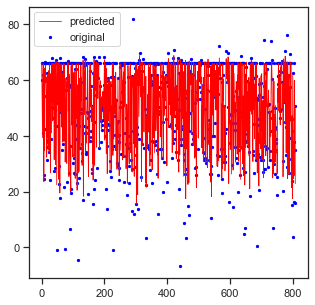

In [185]:
# plotting the result
plt.figure(figsize=(5,5))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_svr_sgd, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### 2.3.4. RandomForest Model

In [186]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=9), X,y,cv=4).mean())

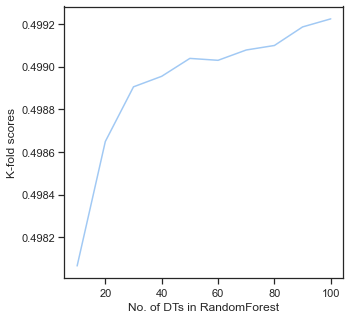

In [187]:
plt.figure(figsize=(5,5))
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [188]:
#RANDOM FOREST TUNING:

#Initiating Random Forest regressor
rf_model = RandomForestRegressor(random_state = 9)

#Define the grid of hyperparameters
params_grid = {'n_estimators': [550],
              'max_depth': [19],
              'min_samples_split': [0.001],
              'min_samples_leaf': [1],
              'max_features': [3], 
              'n_jobs': [-1]
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = rf_model,
                       param_grid = params_grid ,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

#Fitting the grid search
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=9), n_jobs=-1,
             param_grid={'max_depth': [19], 'max_features': [3],
                         'min_samples_leaf': [1], 'min_samples_split': [0.001],
                         'n_estimators': [550], 'n_jobs': [-1]},
             scoring='neg_mean_squared_error', verbose=1)

In [189]:
#let's create a model to test

#K-fold score within the training set of the best model
rf_sgd = grid_model.best_estimator_

#training on the same set
rf_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_rf_sgd = rf_sgd.predict(X_test)

In [190]:
SSE = np.sum((y_test-pred_rf_sgd)**2)
SST = np.sum((y_test-np.mean(pred_rf_sgd))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [191]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_rf_sgd = 1-((n-1)*(1- R2)/(n-k-1))

In [192]:
#Checking if there is overfitting through the use of Cross validation
rf_MSE_CV = -cross_val_score(rf_sgd, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [193]:
#Computing Random Forest predictions in the traning and test sets
rf_predict_train = rf_sgd.predict(X_train)
rf_predict_test = rf_sgd.predict(X_test)

In [194]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score             :',grid_model.best_score_)
print('R^2 Score Test set     : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2               : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('R^2 score training set : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_rf_sgd)) #R^2
print('AdjustR2  :',AdjustR2_rf_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_rf_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Computing the MSE in the traning set, test set, and cross-validation procedure:')
print('CV MSE for RF    :{:.2f}'.format(rf_MSE_CV.mean()))
print('Train MSE for RF :{:.2f}'.format(MSE(y_train,rf_predict_train)))
print('Test MSE for RF  :{:.2f}'.format(MSE(y_test,rf_predict_test)))
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_rf_sgd[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': 19, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 550, 'n_jobs': -1}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score             : -3.794773236204774
R^2 Score Test set     : 0.985
Test R^2               : 0.985
R^2 score training set : 0.998
---------------------------------------------------------------------------------------------------------------------

SSE= 3271.831176527444
SST= 223032.17717404402
SSR= 219760.34599751656
Coefficient of Determination= 0.9853302280505729
-----------------------------------------------------------------------------------------------------------------------
------------------------------------------------------

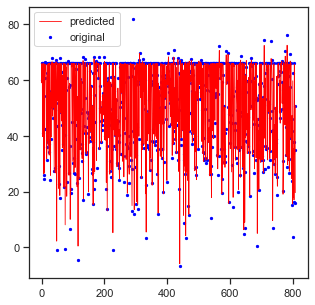

In [195]:
# plotting the result
plt.figure(figsize=(5,5))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_rf_sgd, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### 2.3.5. Adaboost Model

In [196]:
#Graph k-fold score vs no. of estimators in Ada Boost
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(AdaBoostRegressor(n_estimators=i,random_state=40),
                                  X,y,cv=15).mean())

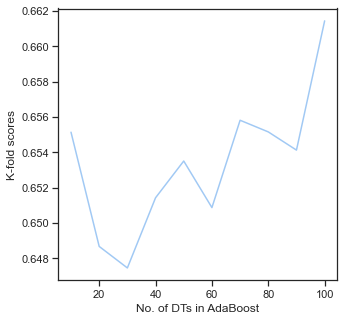

In [197]:
plt.figure(figsize=(5,5))
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in AdaBoost')
plt.ylabel('K-fold scores')
plt.show()

In [198]:
#including other params like max_depth, we will apply gridsearch to fine the best settings 
#Ada Boost TUNING

params = {
            'n_estimators': [100],
            'base_estimator': [DecisionTreeRegressor(max_depth = 19, random_state = 0)]
        }
grid_model = GridSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
grid_model.fit(X,y)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=19,
                                                                  random_state=0)],
                         'n_estimators': [100]})

In [199]:
#let's create a model to test

#K-fold score within the training set of the best model
adab_sgd = grid_model.best_estimator_

#training on the same set
adab_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_adab_sgd = adab_sgd.predict(X_test)

In [200]:
SSE = np.sum((y_test-pred)**2)
SST = np.sum((y_test-np.mean(pred))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [201]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_adab_sgd = 1-((n-1)*(1- R2)/(n-k-1))

In [202]:
#Checking if there is overfitting through the use of Cross validation
adab_MSE_CV = -cross_val_score(adab_sgd, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [203]:
#Computing Random Forest predictions in the traning and test sets
adab_predict_train = adab_sgd.predict(X_train)
adab_predict_test = adab_sgd.predict(X_test)

In [204]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score             :',grid_model.best_score_)
print('R^2 Score Test set     : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2               : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('R^2 score training set : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_adab_sgd)) #R^2
print('AdjustR2  :',AdjustR2_adab_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_adab_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Computing the MSE in the traning set, test set, and cross-validation procedure:')
print('CV MSE for RF    :{:.2f}'.format(rf_MSE_CV.mean()))
print('Train MSE for RF :{:.2f}'.format(MSE(y_train,rf_predict_train)))
print('Test MSE for RF  :{:.2f}'.format(MSE(y_test,rf_predict_test)))
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_adab_sgd[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'base_estimator': DecisionTreeRegressor(max_depth=19, random_state=0), 'n_estimators': 100}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score             : 0.5367620469884427
R^2 Score Test set     : 0.982
Test R^2               : 0.982
R^2 score training set : 1.000
---------------------------------------------------------------------------------------------------------------------

SSE= 3271.8311765274434
SST= 223032.17717404402
SSR= 219760.34599751656
Coefficient of Determination= 0.9853302280505729
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------

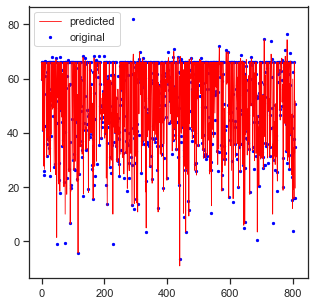

In [205]:
# plotting the result
plt.figure(figsize=(5,5))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_adab_sgd, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### 2.3.6. Decision Tree Regressor Model Opt

In [206]:
#Graph k-fold score vs no. of estimators in Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(1,11,1):
    dtree = DecisionTreeRegressor(max_depth=i,random_state=42)
    scores.append(cross_val_score(dtree, X,y,cv=5).mean())

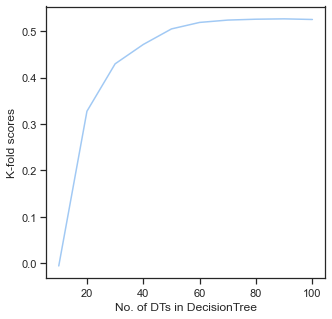

In [207]:
plt.figure(figsize=(5,5))
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in DecisionTree')
plt.ylabel('K-fold scores')
plt.show()

In [208]:
#Decision Tree TUNING:

#Initiating Random Forest regressor
dtree_model = DecisionTreeRegressor(random_state=0)

#Define the grid of hyperparameters
params_grid = {
              'max_depth': [3],
              'min_samples_split': [0.01],
              'min_samples_leaf': [0.05],
              'max_features': [3]
              
              }

#Initiate Grid search
grid_model = GridSearchCV( estimator =dtree_model,
                       param_grid = params_grid ,
                       cv = 10,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

#Fitting the grid search
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3], 'max_features': [3],
                         'min_samples_leaf': [0.05],
                         'min_samples_split': [0.01]},
             scoring='neg_mean_squared_error', verbose=1)

In [209]:
#let's create a model to test

#K-fold score within the training set of the best model
dtree_sgd = grid_model.best_estimator_

#training on the same set
dtree_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_dtree_sgd = dtree_sgd.predict(X_test)

In [210]:
SSE = np.sum((y_test-pred)**2)
SST = np.sum((y_test-np.mean(pred))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [211]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_dtree_sgd = 1-((n-1)*(1- R2)/(n-k-1))

In [212]:
#Checking if there is overfitting through the use of Cross validation
dtree_MSE_CV = -cross_val_score(dtree_sgd, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [213]:
#Computing Random Forest predictions in the traning and test sets
dtree_predict_train = dtree_sgd.predict(X_train)
dtree_predict_test = dtree_sgd.predict(X_test)

In [214]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score             :',grid_model.best_score_)
print('R^2 Score Test set     : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2               : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('R^2 score training set : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_dtree_sgd)) #R^2
print('AdjustR2  :',AdjustR2_dtree_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_dtree_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Computing the MSE in the traning set, test set, and cross-validation procedure:')
print('CV MSE for RF    :{:.2f}'.format(dtree_MSE_CV.mean()))
print('Train MSE for RF :{:.2f}'.format(MSE(y_train,dtree_predict_train)))
print('Test MSE for RF  :{:.2f}'.format(MSE(y_test,dtree_predict_test)))
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_dtree_sgd[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 0.05, 'min_samples_split': 0.01}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score             : -134.87014688208455
R^2 Score Test set     : 0.500
Test R^2               : 0.500
R^2 score training set : 0.504
---------------------------------------------------------------------------------------------------------------------

SSE= 4092.17
SST= 223040.0765512979
SSR= 218947.9065512979
Coefficient of Determination= 0.98165275916654
-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

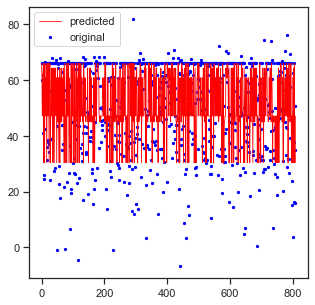

In [215]:
# plotting the result
plt.figure(figsize=(5,5))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_dtree_sgd, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### 2.3.7. Ridge Regressor Model Opt

In [216]:
#Graph k-fold score vs no. of estimators in Ridge

scores = []
for i in range(1,11,1):
    ridge = RidgeCV(alphas=i)
    scores.append(cross_val_score(ridge, X,y,cv=5).mean())

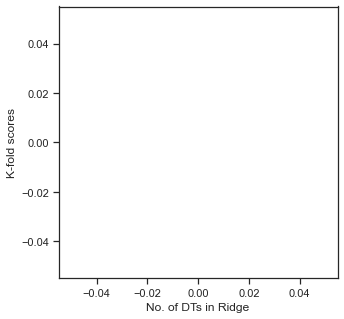

In [217]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11,1),scores)
plt.xlabel('No. of DTs in Ridge')
plt.ylabel('K-fold scores')
plt.show()

In [218]:
#Ridge TUNING:

#Initiating Random Forest regressor
ridge_model = Ridge(random_state = 9)

#Define the grid of hyperparameters
params_grid = {'alpha': [0.1,1],
               'max_iter':[20],
               'tol': [0.001],
               'solver': ['auto','sag', 'saga']
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = ridge_model,
                       param_grid = params_grid ,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

#Fitting the grid search
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished


GridSearchCV(cv=3, estimator=Ridge(random_state=9), n_jobs=-1,
             param_grid={'alpha': [0.1, 1], 'max_iter': [20],
                         'solver': ['auto', 'sag', 'saga'], 'tol': [0.001]},
             scoring='neg_mean_squared_error', verbose=1)

In [219]:
#let's create a model to test

#K-fold score within the training set of the best model
ridge_sgd = grid_model.best_estimator_

#training on the same set
ridge_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_ridge_sgd = ridge_sgd.predict(X_test)

In [220]:
SSE = np.sum((y_test-pred)**2)
SST = np.sum((y_test-np.mean(pred))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [221]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_ridge_sgd = 1-((n-1)*(1- R2)/(n-k-1))

In [222]:
#Checking if there is overfitting through the use of Cross validation
ridge_MSE_CV = -cross_val_score(dtree_sgd, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [223]:
#Computing Random Forest predictions in the traning and test sets
ridge_predict_train = ridge_sgd.predict(X_train)
ridge_predict_test = ridge_sgd.predict(X_test)

In [224]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score             :',grid_model.best_score_)
print('R^2 Score Test set     : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2               : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('R^2 score training set : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_ridge_sgd)) #R^2
print('AdjustR2  :',AdjustR2_ridge_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_ridge_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Computing the MSE in the traning set, test set, and cross-validation procedure:')
print('CV MSE for RF    :{:.2f}'.format(ridge_MSE_CV.mean()))
print('Train MSE for RF :{:.2f}'.format(MSE(y_train,ridge_predict_train)))
print('Test MSE for RF  :{:.2f}'.format(MSE(y_test,ridge_predict_test)))
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_ridge_sgd[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.1, 'max_iter': 20, 'solver': 'sag', 'tol': 0.001}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score             : -76.22651874343337
R^2 Score Test set     : 0.697
Test R^2               : 0.697
R^2 score training set : 0.701
---------------------------------------------------------------------------------------------------------------------

SSE= 111429.62160448649
SST= 223125.3917651442
SSR= 111695.7701606577
Coefficient of Determination= 0.5005964102831724
-----------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------

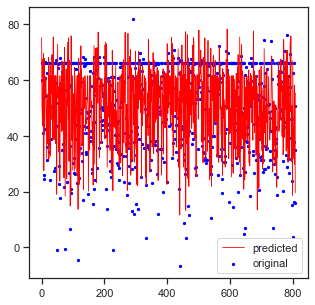

In [225]:
# plotting the result
plt.figure(figsize=(5,5))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_ridge_sgd, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### 2.3.8. Gradient Boosting Regressor Model (GBM) OPT

In [226]:
gbm = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.01, random_state = 100, 
                               loss = "huber", max_depth = 1, verbose = 1)

In [227]:
#Graph k-fold score vs no. of estimators in GBM

scores = []
for i in range(1,1001,100):
    gbm = GradientBoostingRegressor(n_estimators =i)
    scores.append(cross_val_score(gbm, X,y,cv=5).mean())

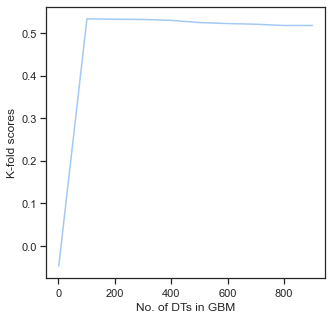

In [228]:
#Graph k-fold score vs no. of estimators in GBM

scores = []
for i in range(1,1001,100):
    gbm = GradientBoostingRegressor(n_estimators =i)
    scores.append(cross_val_score(gbm, X,y,cv=5).mean())
plt.figure(figsize=(5,5))
plt.plot(range(1,1001,100),scores)
plt.xlabel('No. of DTs in GBM')
plt.ylabel('K-fold scores')
plt.show()

In [229]:
#Gradient Boosting Regressor Model TUNING:

#Initiating Gradient Boosting Regressor Model
gbm_model = GradientBoostingRegressor( )

#Define the grid of hyperparameters
params_grid = {'n_estimators': [1000],
              'max_depth': [19],
              'min_samples_split': [0.001],
              'min_samples_leaf': [1],
              'max_features': [3], 
              'learning_rate': [0.1]
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = gbm_model,
                       param_grid = params_grid ,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

#Fitting the grid search
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s finished


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [19],
                         'max_features': [3], 'min_samples_leaf': [1],
                         'min_samples_split': [0.001], 'n_estimators': [1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [230]:
#let's create a model to test

#K-fold score within the training set of the best model
gbm_sgd = grid_model.best_estimator_

#training on the same set
gbm_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_gbm_sgd = gbm_sgd.predict(X_test)

In [231]:
SSE = np.sum((y_test-pred)**2)
SST = np.sum((y_test-np.mean(pred))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [232]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_gbm_sgd = 1-((n-1)*(1- R2)/(n-k-1))
gbm
#Checking if there is overfitting through the use of Cross validation
gbm_MSE_CV = -cross_val_score(gbm_sgd, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)
gbm

GradientBoostingRegressor(n_estimators=901)

In [233]:
#Computing GBM predictions in the traning and test sets
gbm_predict_train = gbm_sgd.predict(X_train)
gbm_predict_test = gbm_sgd.predict(X_test)
gbm

GradientBoostingRegressor(n_estimators=901)

In [234]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score             :',grid_model.best_score_)
print('R^2 Score Test set     : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2               : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('R^2 score training set : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_gbm_sgd)) #R^2
print('AdjustR2  :',AdjustR2_ridge_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_gbm_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Computing the MSE in the traning set, test set, and cross-validation procedure:')
print('CV MSE for RF    :{:.2f}'.format(gbm_MSE_CV.mean()))
print('Train MSE for RF :{:.2f}'.format(MSE(y_train,gbm_predict_train)))
print('Test MSE for RF  :{:.2f}'.format(MSE(y_test,gbm_predict_test)))
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_gbm_sgd[:10])
print(y_test[:10])


Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'learning_rate': 0.1, 'max_depth': 19, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 1000}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score             : -4.462258798892294
R^2 Score Test set     : 0.986
Test R^2               : 0.986
R^2 score training set : 1.000
---------------------------------------------------------------------------------------------------------------------

SSE= 67629.49612739278
SST= 223058.7315272706
SSR= 155429.23539987783
Coefficient of Determination= 0.6968085684683248
-----------------------------------------------------------------------------------------------------------------------
----------------------------------------------

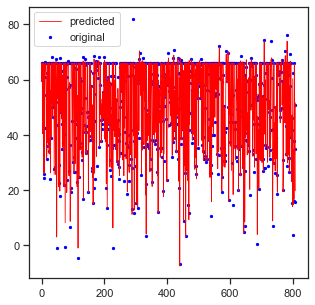

In [235]:
# plotting the result
plt.figure(figsize=(5,5))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_gbm_sgd, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### 2.3.9. XGBoost Regressor Model OPT

In [236]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

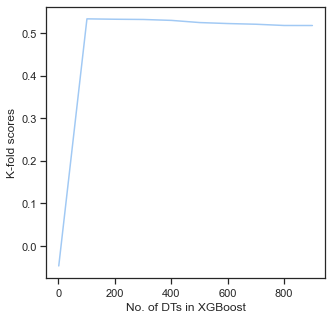

In [237]:
plt.figure(figsize=(5,5))
plt.plot(range(1,1001,100),scores)
plt.xlabel('No. of DTs in XGBoost')
plt.ylabel('K-fold scores')
plt.show()

In [238]:
#Gradient Boosting Regressor Model TUNING:

#Initiating Gradient Boosting Regressor Model
xg_reg_model = xgb.XGBRegressor(objective ='reg:linear')

#Define the grid of hyperparameters
params_grid = {'n_estimators': [10],
              'max_depth': [5],
              'subsample': [0.1],
              'colsample_bytree': [0.3],
              'objective': ['reg:linear'], 
              'alpha':[0.1],
              'learning_rate': [0.1]
              }

#Initiate Grid search
grid_model = GridSearchCV(estimator = xg_reg_model,
                       param_grid = params_grid ,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

#Fitting the grid search
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[14:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [239]:
#let's create a model to test

#K-fold score within the training set of the best model
xg_reg_sgd = grid_model.best_estimator_

#training on the same set
xg_reg_sgd.fit(X_train,y_train)

#let's create a y prediction on based X_test
pred_xg_reg_sgd =  xg_reg_sgd.predict(X_test)

[14:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [240]:
SSE = np.sum((y_test-pred)**2)
SST = np.sum((y_test-np.mean(pred))**2)
SSR = SST-SSE
R2 =1-(SSE/SST)

In [241]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring
n = len(X_test)#Total size of test 
k = len(X_test.iloc[0])
AdjustR2_xg_reg_sgd = 1-((n-1)*(1- R2)/(n-k-1))

In [242]:
#Checking if there is overfitting through the use of Cross validation
xg_reg_MSE_CV = -cross_val_score(xg_reg_sgd, X_train, y_train,
                            cv = 10, 
                            scoring = 'neg_mean_squared_error',
                            n_jobs = -1)

In [243]:
#Computing GBM predictions in the traning and test sets
xg_reg_predict_train =  xg_reg_sgd.predict(X_train)
xg_reg_predict_test =  xg_reg_sgd.predict(X_test)

In [244]:
print('Best parameter settings out of the ones we provided in the param_grid:')
print('Best Parameters :',grid_model.best_params_)
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:')
print('Best Score             :',grid_model.best_score_)
print('R^2 Score Test set     : %.3f'%r2_score(y_test, grid_model.best_estimator_.predict(X_test)))
print('Test R^2               : %.3f'%grid_model.best_estimator_.score(X_test, y_test))
print('R^2 score training set : %.3f'%grid_model.best_estimator_.score(X_train, y_train))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('SSE=', float(SSE))
print('SST=', float(SST))
print('SSR=', float(SSR))
print('Coefficient of Determination=', float(R2))
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Checking the performance of the model:')
print('R2        :',r2_score(y_test,pred_xg_reg_sgd)) #R^2
print('AdjustR2  :',AdjustR2_xg_reg_sgd)
print('RMSE      :',math.sqrt(mean_squared_error(y_test, pred_xg_reg_sgd))) #Root-Mean Square Error (RMSE)
#print('MSE       :',mean_squared_error(y_test,pred)) #MSE (SAMPLE COMMON VARIANCE ESTIMATE ERRORS)
print('-----------------------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Computing the MSE in the traning set, test set, and cross-validation procedure:')
print('CV MSE for RF    :{:.2f}'.format(xg_reg_MSE_CV.mean()))
print('Train MSE for RF :{:.2f}'.format(MSE(y_train,xg_reg_predict_train)))
print('Test MSE for RF  :{:.2f}'.format(MSE(y_test,xg_reg_predict_test)))
print('---------------------------------------------------------------------------------------------------------------------\n')
pred = grid_model.best_estimator_.predict(X_test)
print(pred_xg_reg_sgd[:10])
print(y_test[:10])

Best parameter settings out of the ones we provided in the param_grid:
Best Parameters : {'alpha': 0.1, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10, 'objective': 'reg:linear', 'subsample': 0.1}
---------------------------------------------------------------------------------------------------------------------

Fitting model into the training set, Test score , and also this score is available from the gridsearch result as well:
Best Score             : -442.90537215827635
R^2 Score Test set     : -0.637
Test R^2               : -0.637
R^2 score training set : -0.783
---------------------------------------------------------------------------------------------------------------------

SSE= 3097.4869272879378
SST= 223031.93615366588
SSR= 219934.44922637794
Coefficient of Determination= 0.9861119130259721
-----------------------------------------------------------------------------------------------------------------------
-----------------------------

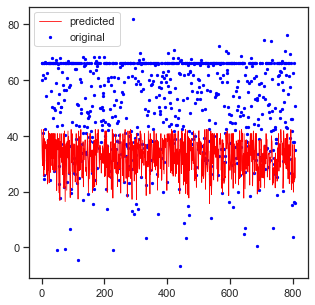

In [245]:
# plotting the result
plt.figure(figsize=(5,5))
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_xg_reg_sgd, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

## 2.4. Ensemble methods
#############################################################################################################################

In [246]:
reg1 = GradientBoostingRegressor(random_state=1)
reg1 = reg1.fit(X_train,y_train)

In [247]:
reg2 = RandomForestRegressor(random_state=1)
reg2 = reg2.fit(X_train,y_train)

In [248]:
reg3 = LinearRegression()
reg3 = reg3.fit(X_train,y_train)

In [249]:
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])

In [250]:
ereg = ereg.fit(X_train,y_train)

In [251]:
y_pred = ereg.predict(X_test)

In [252]:
X_test = X_test[:20]

pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)
pred3 = reg3.predict(X_test)
pred4 = ereg.predict(X_test)

<Figure size 360x360 with 0 Axes>

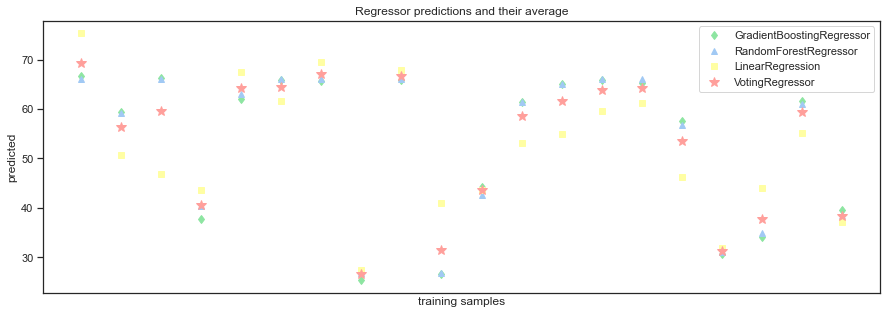

In [253]:
plt.figure(figsize=(5,5))
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(pred2, 'b^', label='RandomForestRegressor')
plt.plot(pred3, 'ys', label='LinearRegression')
plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

## 2.5. Missing values support Model
###############################################################################################################################

In [254]:
gbdt = HistGradientBoostingRegressor(min_samples_leaf=1).fit(X_train,y_train)
gbdt.predict(X_test)

array([65.97843161, 58.29462281, 65.8520946 , 39.06681462, 62.15994702,
       65.98507601, 66.1994485 , 26.24354483, 66.18461891, 25.58949935,
       42.43518174, 60.36202248, 65.19136423, 65.94175465, 66.04245693,
       55.92541247, 31.29695712, 34.84173805, 61.15597189, 38.01722206])

======================================================================================================================

# -------------------------------------------  PART THREE  --------------------------------------------   

======================================================================================================================

## -----------------------------------------------------  CONLUSION  --------------------------------------------------------



## A. Visualization the Result

###############################################################################################################################

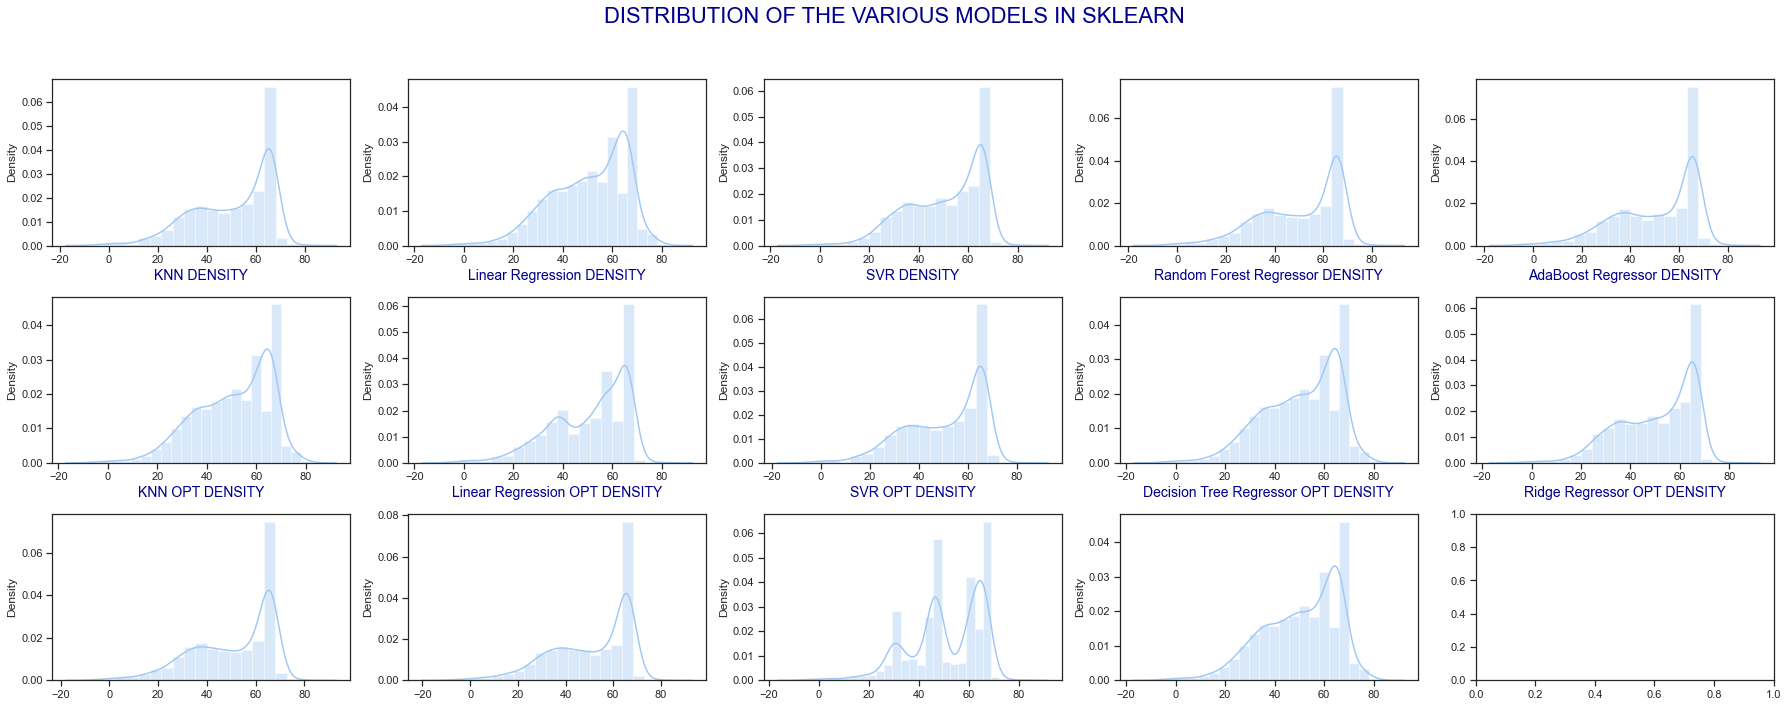

In [255]:
#Density-Plot and Box-Plot
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(nrows =3, ncols = 5, figsize = (25, 10))

sns.distplot((y_test,pred_knn), ax = ax[0,0])
ax[0,0].set_xlabel("KNN DENSITY", color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_l_reg), ax = ax[0,1])
ax[0,1].set_xlabel('Linear Regression DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_svr), ax = ax[0,2])
ax[0,2].set_xlabel('SVR DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_rf), ax = ax[0,3])
ax[0,3].set_xlabel('Random Forest Regressor DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_dtree), ax = ax[0,4])
ax[1,3].set_xlabel('Decision Tree Regressor DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_ridge), ax = ax[1,0])
ax[1,4].set_xlabel('Ridge Regressor DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_adab), ax = ax[1,1])
ax[0,4].set_xlabel('AdaBoost Regressor DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_knn_opt), ax = ax[1,2])
ax[1,0].set_xlabel('KNN OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_l_sgdreg), ax = ax[1,3])
ax[1,1].set_xlabel('Linear Regression OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_svr_sgd), ax = ax[1,4])
ax[1,2].set_xlabel('SVR OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_rf_sgd), ax = ax[2,0])
ax[1,3].set_xlabel('Random Forest Regressor OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_adab_sgd), ax = ax[2,1])
ax[1,4].set_xlabel('AdaBoost Regressor OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_dtree_sgd), ax = ax[2,2])
ax[1,3].set_xlabel('Decision Tree Regressor OPT DENSITY', color = "darkblue", fontsize = 14)

sns.distplot((y_test,pred_ridge_sgd), ax = ax[2,3])
ax[1,4].set_xlabel('Ridge Regressor OPT DENSITY', color = "darkblue", fontsize = 14)

fig.suptitle('DISTRIBUTION OF THE VARIOUS MODELS IN SKLEARN', color = "darkblue", fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

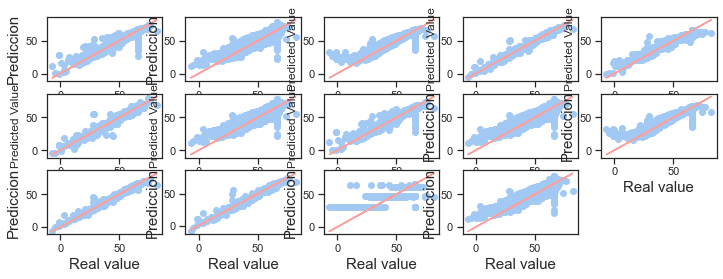

In [256]:
# PLOTTING THE PREDICTIONS
plt.rcParams['figure.figsize']= 12,4

plt.subplot(3,5,1)
plt.scatter(y_test,pred_knn)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(3,5,2)
plt.scatter(y_test,pred_l_sgdreg)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(3,5,3)
plt.scatter(y_test,pred_svr)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value') 

plt.subplot(3,5,4)
plt.scatter(y_test,pred_rf)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value')  

plt.subplot(3,5,5)
plt.scatter(y_test,pred_adab)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value') 

plt.subplot(3,5,6)
plt.scatter(y_test,pred_dtree)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value')  

plt.subplot(3,5,7)
plt.scatter(y_test,pred_ridge)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value') 

plt.subplot(3,5,8)
plt.scatter(y_test,pred_knn_opt)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Value')  
plt.ylabel('Predicted Value') 

plt.subplot(3,5,9)
plt.scatter(y_test,pred_l_sgdreg)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(3,5,10)
plt.scatter(y_test,pred_svr_sgd)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(3,5,11)
plt.scatter(y_test,pred_rf_sgd)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(3,5,12)
plt.scatter(y_test,pred_adab_sgd)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(3,5,13)
plt.scatter(y_test,pred_dtree_sgd)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

plt.subplot(3,5,14)
plt.scatter(y_test,pred_ridge_sgd)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Real value', fontsize = 15)  
plt.ylabel('Prediccion', fontsize = 15) 

fig.suptitle('PREDICTIONS OF THE VARIOUS MODELS IN SKLEARN', color = "darkblue", fontsize = 22)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

## B. COMPARE ALL MODELS

In [257]:
print('Display R-squared, Adjust R-squared and Root Mean Square Error(RMSE) For Regression Models')
print('---------------------------------------------------------------------------------------------------------------------\n')
print('-----------------------------------------------------------------------------------------------------------------------')
print('*********************************...........INFERENCE AND CONCLUSION.............**************************************')
print('-----------------------------------------------------------------------------------------------------------------------')
results_df= append_results("K Neighbors Regressor",knn,results_df,y_test,pred_knn)
results_df= append_results("Linear Regression", l_reg, results_df, y_test, pred_l_reg)
results_df= append_results("SVR",svr,results_df,y_test,pred_svr)
results_df= append_results("Random Forest Regressor",rf_reg,results_df,y_test,pred_rf)
results_df= append_results("AdaBoost Regressor",adab_reg,results_df,y_test,pred_adab)
results_df= append_results("Ridge Regressor",ridge_reg,results_df,y_test,pred_ridge)
results_df= append_results("Decision Tree Regressor",dtree,results_df,y_test,pred_dtree)
results_df= append_results("XGBoost Regressor",xg_reg,results_df,y_test,pred_xg_reg)
results_df= append_results("Gradient Boosting Regressor",gbm,results_df,y_test,pred_gbm)
results_df= append_results("LassoCV Regressor",lasso,results_df,y_test,pred_lasso)
results_df= append_results("K Neighbors Regressor opt",knn_opt,results_df,y_test,pred_knn_opt)
results_df= append_results("Linear Regression opt", l_sgdreg, results_df, y_test, pred_l_sgdreg)
results_df= append_results("SVR opt",svr_sgd,results_df,y_test,pred_svr_sgd)
results_df= append_results("Random Forest Regressor opt",rf_sgd,results_df,y_test,pred_rf_sgd)
results_df= append_results("AdaBoost Regressor opt",adab_sgd,results_df,y_test,pred_adab_sgd)
results_df= append_results("Decision Tree Regressor opt",dtree_sgd,results_df,y_test,pred_dtree_sgd)
results_df= append_results("Ridge Regressor opt",ridge_sgd,results_df,y_test,pred_ridge_sgd)
results_df= append_results("XGBoost Regressor opt",xg_reg_sgd,results_df,y_test,pred_xg_reg_sgd)
results_df= append_results("Gradient Boosting Regressor opt",gbm_sgd,results_df,y_test,pred_gbm_sgd)
results_df

Display R-squared, Adjust R-squared and Root Mean Square Error(RMSE) For Regression Models
---------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------
*********************************...........INFERENCE AND CONCLUSION.............**************************************
-----------------------------------------------------------------------------------------------------------------------
[14:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1

Model  Cross Val Score    MAE   MSE  RMSE    R2  \
0             K Neighbors Regressor             2.70  27.25  5.22  0.90  0.90   
1                 Linear Regression             7.11  83.60  9.14  0.70  0.69   
2                               SVR             3.97  46.93  6.85  0.83  0.83   
3           Random Forest Regressor             1.13   5.07  2.25  0.98  0.98   
4                AdaBoost Regressor             3.65  24.63  4.96  0.91  0.91   
5                   Ridge Regressor             7.11  83.60  9.14  0.70  0.69   
6           Decision Tree Regressor             1.63   9.42  3.07  0.97  0.97   
7                 XGBoost Regressor             1.18   4.92  2.22  0.98  0.98   
8       Gradient Boosting Regressor             1.45   6.60  2.57  0.98  0.98   
9                 LassoCV Regressor             7.12  83.71  9.15  0.70  0.69   
10        K Neighbors Regressor opt             2.70  27.25  5.22  0.90  0.90   
11            Linear Regression opt             7.11  83.60  9.14  0.70  0.69   
12                          SVR opt             3.97  46.97  6.85  0.83  0.83   
13      Random Forest Regressor opt             1.10   4.04  2.01  0.99  0.99   
14           AdaBoost Regressor opt             1.13   5.06  2.25  0.98  0.98   
15      Decision Tree Regressor opt             8.05 137.74 11.74  0.50  0.50   
16              Ridge Regressor opt             7.11  83.60  9.14  0.70  0.69   
17            XGBoost Regressor opt            18.94 451.18 21.24 -0.64 -0.65   
18  Gradient Boosting Regressor opt             1.07   3.83  1.96  0.99  0.99   

    AdjustR2  
0       0.67  
1       0.35  
2       0.59  
3       0.53  
4       0.50  
5       0.35  
6       0.53  
7      -0.42  
8       0.52  
9       0.37  
10      0.68  
11      0.35  
12      0.59  
13      0.57  
14      0.54  
15      0.23  
16      0.35  
17     -0.50  
18      0.55

#############################################################################################################################

#  ''''''''''''' MODEL GENERATION ON BASED OF TEST AND TRAIN   ''''''''''''''''''

##############################################################################################################################

## -- Base Model (Mean) --

In [258]:
df.drop(['rh','ah','day'],axis=1,inplace=True)
train=df[df['source']=='train']
test=df[df['source']=='test']

In [259]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['source','Temperature'],axis=1,inplace=True)

In [260]:
train.to_csv('My_Store_Train_Forecast_Class.csv',index=False)
test.to_csv('My_Store_test_Forecast_Class.csv',index=False)

In [261]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,random_state=0)


In [262]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 0 to 2306
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average barometer  2307 non-null   float64
 1   Dewpoint           2307 non-null   float64
 2   Humidity           2307 non-null   float64
 3   Temperature        2307 non-null   float64
 4   Windspeed          2307 non-null   float64
 5   MaxTemperature     2307 non-null   float64
 6   MinTemperature     2307 non-null   float64
 7   year               2307 non-null   int64  
 8   month              2307 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 180.2 KB


In [263]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 2307 to 3235
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average barometer  929 non-null    float64
 1   Dewpoint           929 non-null    float64
 2   Humidity           929 non-null    float64
 3   Windspeed          929 non-null    float64
 4   MaxTemperature     929 non-null    float64
 5   MinTemperature     929 non-null    float64
 6   year               929 non-null    int64  
 7   month              929 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 65.3 KB


In [264]:
from sklearn import model_selection,metrics
from sklearn.metrics import r2_score,mean_squared_error
import math

## -- Function for Checking different Models Store Sales--¶

In [265]:
def modelfit(alg,dtrain,dtest,predictors,target,IDcol,filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20)
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)) )
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)) )
    
    #Print R-square MSE RMSE
  
    
    print("R-square :",r2_score(dtrain[target],dtrain_predictions))
    print("MSE : ",mean_squared_error(dtrain[target],dtrain_predictions)) #MSE
    print("RMSE : ",math.sqrt(mean_squared_error(dtrain[target],dtrain_predictions))) #RMSE
    
    
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## -- Linear Regression Model --

In [266]:
target = "Temperature"

IDcol = ['Average barometer','Dewpoint','Humidity','Windspeed','MaxTemperature','MinTemperature']
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'LinearReg_Model_Ver_1.csv')


Model Report
RMSE : 14.92
CV Score : Mean - 1.128 | Std - 0.7542 | Min - 0.2339 | Max - 2.654
R-square : 0.059440410868147664
MSE :  222.52311106706355
RMSE :  14.917208554788779


## -- CLIMATE Linear Regression --


Model Report
RMSE : 14.92
CV Score : Mean - 1.128 | Std - 0.7542 | Min - 0.2339 | Max - 2.654
R-square : 0.059440410868147664
MSE :  222.52311106706355
RMSE :  14.917208554788779


<AxesSubplot:title={'center':'Model Coefficients'}>

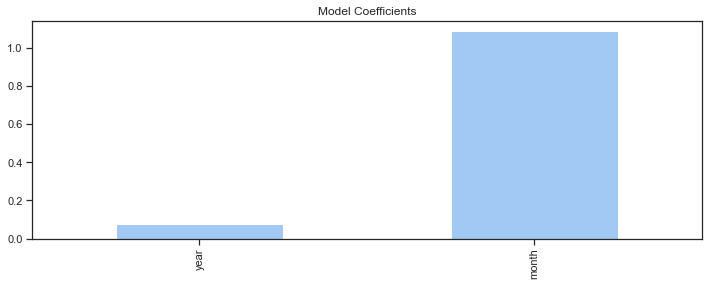

In [267]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

<AxesSubplot:title={'center':'Model Coefficients'}>

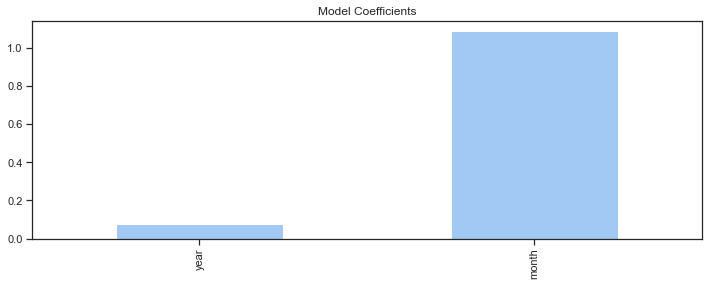

In [268]:
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## -- CLIMATE Ridge Regression Model --


Model Report
RMSE : 14.92
CV Score : Mean - 1.124 | Std - 0.7555 | Min - 0.2218 | Max - 2.653
R-square : 0.059306235375931826
MSE :  222.5548550929624
RMSE :  14.918272523752957


<AxesSubplot:title={'center':'Model Coefficients'}>

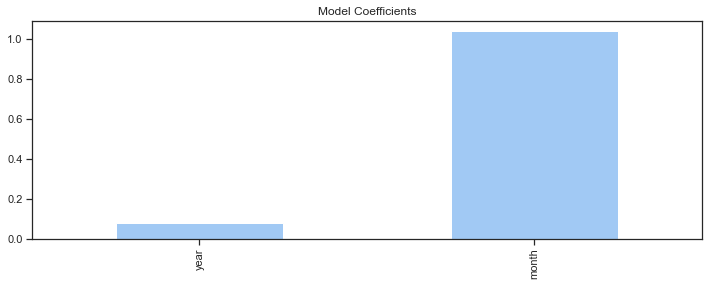

In [269]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

## -- CLIMATE Decision Tree Model --


Model Report
RMSE : 9.186
CV Score : Mean - 0.5447 | Std - 0.181 | Min - 0.2009 | Max - 0.868
R-square : 0.6433452546735148
MSE :  84.37947411724818
RMSE :  9.1858300723042


<AxesSubplot:title={'center':'Feature Importances'}>

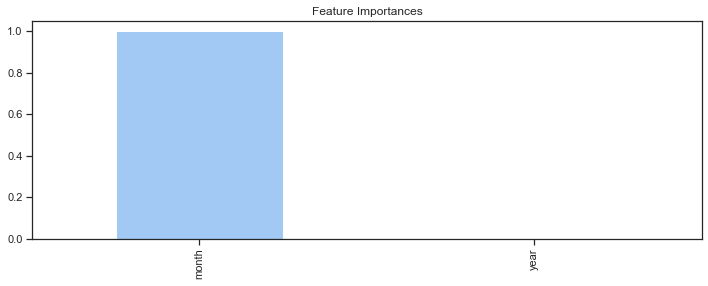

In [270]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 9.186
CV Score : Mean - 0.5447 | Std - 0.181 | Min - 0.2009 | Max - 0.868
R-square : 0.6433452546735149
MSE :  84.37947411724818
RMSE :  9.1858300723042


<AxesSubplot:title={'center':'Feature Importances'}>

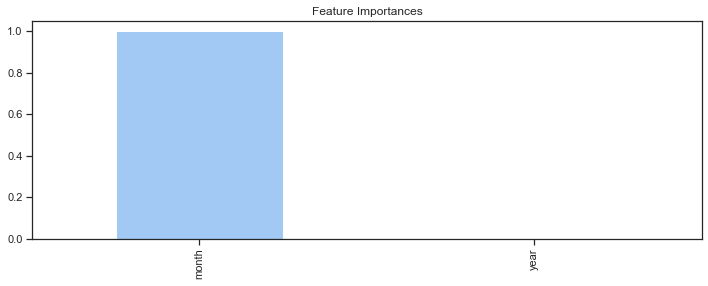

In [271]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 4.782
CV Score : Mean - 0.8818 | Std - 0.09694 | Min - 0.4912 | Max - 0.966
R-square : 0.9033446813483131
MSE :  22.86728289847528
RMSE :  4.781974790656605


<AxesSubplot:title={'center':'Feature Importances'}>

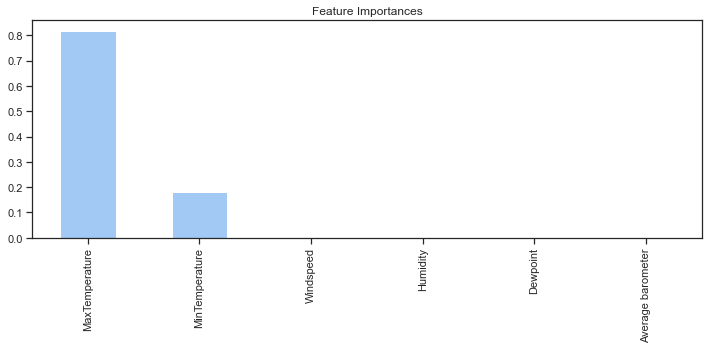

In [272]:
## Here you can see that the RMSE is 1058 and the mean CV error is 1091. 
## This tells us that the model is slightly overfitting. 
## Lets try making a decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150.

predictors = ['Average barometer','Dewpoint','Humidity','Windspeed','MaxTemperature','MinTemperature']
alg4 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(alg4, train, test, predictors, target, IDcol, 'alg4.csv')
coef4 = pd.Series(alg4.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

## -- CLIMATE Random Forest Model --


Model Report
RMSE : 9.194
CV Score : Mean - 0.5301 | Std - 0.1856 | Min - 0.1127 | Max - 0.863
R-square : 0.642720494858163
MSE :  84.52728346328877
RMSE :  9.1938720604155


<AxesSubplot:title={'center':'Feature Importances'}>

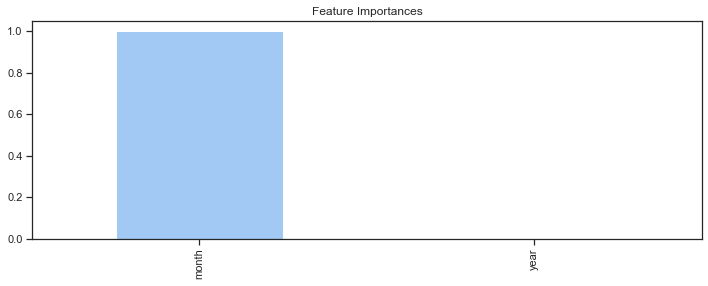

In [273]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

############################################################################################################################

## Thank You!

##############################################################################################################################